<a href="https://colab.research.google.com/github/sai-krishna-k/bird-bones-and-their-classification/blob/main/Project_6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [152]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## **Upload File**

In [153]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/sai-krishna-k/bird-bones-and-their-classification/main/birds%20bones%20and%20their%20class.csv')
df.head(n=10)
df.fillna(df.median(), inplace=True)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Length of Humerus (mm)            420 non-null    float64
 1   Diameter of Humerus (mm)          420 non-null    float64
 2   Length of Ulna (mm)               420 non-null    float64
 3   Diameter of Ulna (mm)             420 non-null    float64
 4   Length of Femur (mm)              420 non-null    float64
 5   Diameter of Femur (mm)            420 non-null    float64
 6   Length of Tibiotarsus (mm)        420 non-null    float64
 7   Diameter of Tibiotarsus (mm)      420 non-null    float64
 8   Length of Tarsometatarsus (mm)    420 non-null    float64
 9   Diameter of Tarsometatarsus (mm)  420 non-null    float64
 10  class                             420 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 36.2 KB


### **Classes**

In [155]:
y = df['class']
print(y.shape)
target = df['class'].to_numpy()
target.shape

(420,)


(420,)

### **Features**

Data Matrix

In [156]:
X = df.iloc[:,0:10]
X.head(10)
X.shape

(420, 10)

In [157]:
X.describe().transpose()

count       mean        std    min      25%  \
Length of Humerus (mm)            420.0  64.601762  53.779546   9.85  25.2050   
Diameter of Humerus (mm)          420.0   4.368500   2.851524   1.14   2.1900   
Length of Ulna (mm)               420.0  68.933905  58.613103  14.09  28.1325   
Diameter of Ulna (mm)             420.0   3.594143   2.181985   1.00   1.8700   
Length of Femur (mm)              420.0  36.845071  19.935272  11.83  21.3325   
Diameter of Femur (mm)            420.0   3.219214   2.021455   0.93   1.7175   
Length of Tibiotarsus (mm)        420.0  64.603095  37.757629   5.50  36.4725   
Diameter of Tibiotarsus (mm)      420.0   3.180690   2.078617   0.87   1.5675   
Length of Tarsometatarsus (mm)    420.0  39.212143  23.159515   7.77  23.0425   
Diameter of Tarsometatarsus (mm)  420.0   2.928357   2.183330   0.66   1.4275   

                                     50%      75%     max  
Length of Humerus (mm)            44.180  90.2200  420.00  
Diameter of Humerus (mm)           3.500   5.8050   17.84  
Length of Ulna (mm)               43.710  97.2050  422.00  
Diameter of Ulna (mm)              2.945   4.7700   12.00  
Length of Femur (mm)              31.130  47.1000  117.07  
Diameter of Femur (mm)             2.520   4.1225   11.64  
Length of Tibiotarsus (mm)        52.120  82.8700  240.00  
Diameter of Tibiotarsus (mm)       2.490   4.2525   11.03  
Length of Tarsometatarsus (mm)    31.740  50.1550  175.00  
Diameter of Tarsometatarsus (mm)   2.230   3.4900   14.09

Notice that the data is not standardizd. So we need to standarize it.

In [158]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [159]:
df.describe().transpose()

count          mean       std       min  \
Length of Humerus (mm)            420.0 -1.691768e-16  1.001193 -1.019292   
Diameter of Humerus (mm)          420.0  0.000000e+00  1.001193 -1.133552   
Length of Ulna (mm)               420.0 -1.353415e-16  1.001193 -0.936809   
Diameter of Ulna (mm)             420.0 -3.383537e-16  1.001193 -1.190309   
Length of Femur (mm)              420.0 -8.458842e-17  1.001193 -1.256311   
Diameter of Femur (mm)            420.0 -1.691768e-16  1.001193 -1.133810   
Length of Tibiotarsus (mm)        420.0 -3.383537e-16  1.001193 -1.567195   
Diameter of Tibiotarsus (mm)      420.0 -2.030122e-16  1.001193 -1.112974   
Length of Tarsometatarsus (mm)    420.0 -3.045183e-16  1.001193 -1.359253   
Diameter of Tarsometatarsus (mm)  420.0 -1.353415e-16  1.001193 -1.040183   

                                       25%       50%       75%       max  
Length of Humerus (mm)           -0.733434 -0.380184  0.476925  6.616309  
Diameter of Humerus (mm)         -0.764888 -0.304937  0.504366  4.729949  
Length of Ulna (mm)              -0.696944 -0.430859  0.482909  6.030856  
Diameter of Ulna (mm)            -0.791114 -0.297856  0.539536  3.856984  
Length of Femur (mm)             -0.779075 -0.287023  0.515025  4.029070  
Diameter of Femur (mm)           -0.743774 -0.346309  0.447382  4.170674  
Length of Tibiotarsus (mm)       -0.745919 -0.331005  0.484371  4.650877  
Diameter of Tibiotarsus (mm)     -0.777014 -0.332680  0.516251  3.780720  
Length of Tarsometatarsus (mm)   -0.699018 -0.323023  0.473063  5.870149  
Diameter of Tarsometatarsus (mm) -0.688236 -0.320240  0.257548  5.118307

Notice that the data is now standardizd.

**Observations and variables**

In [160]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## **Data Visualisation**

### Class Distribution

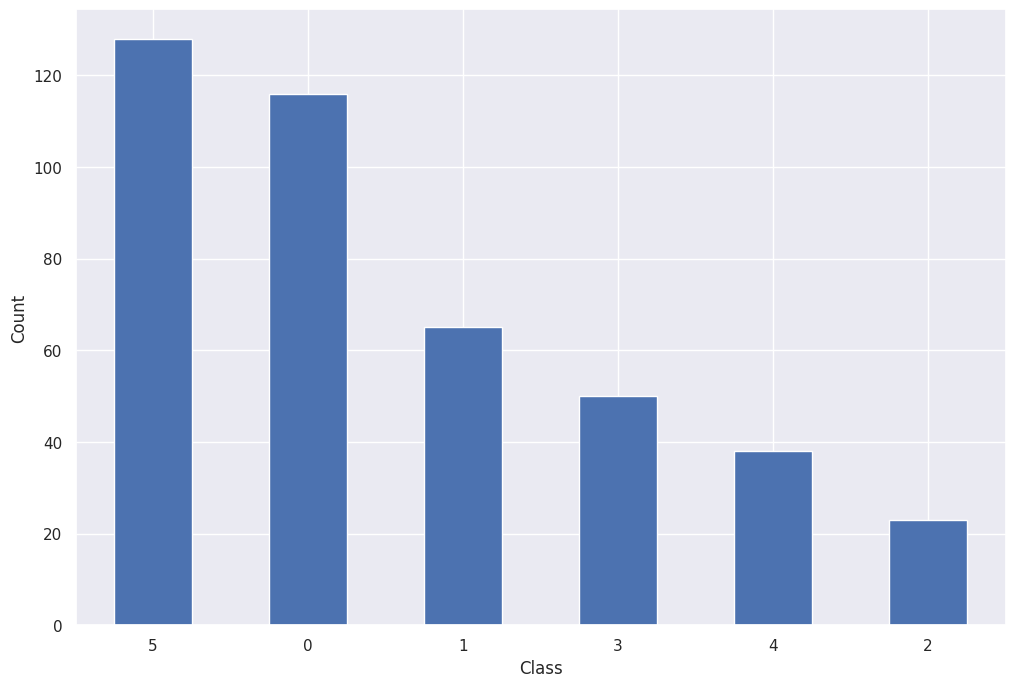

In [161]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

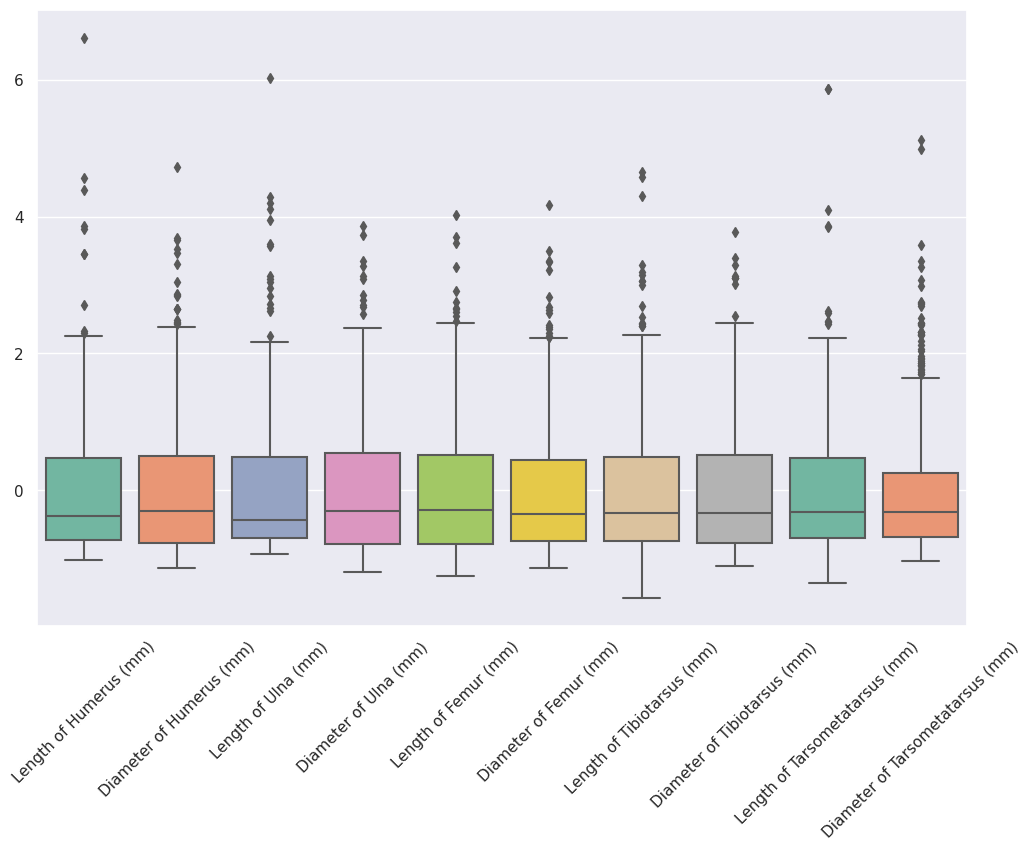

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


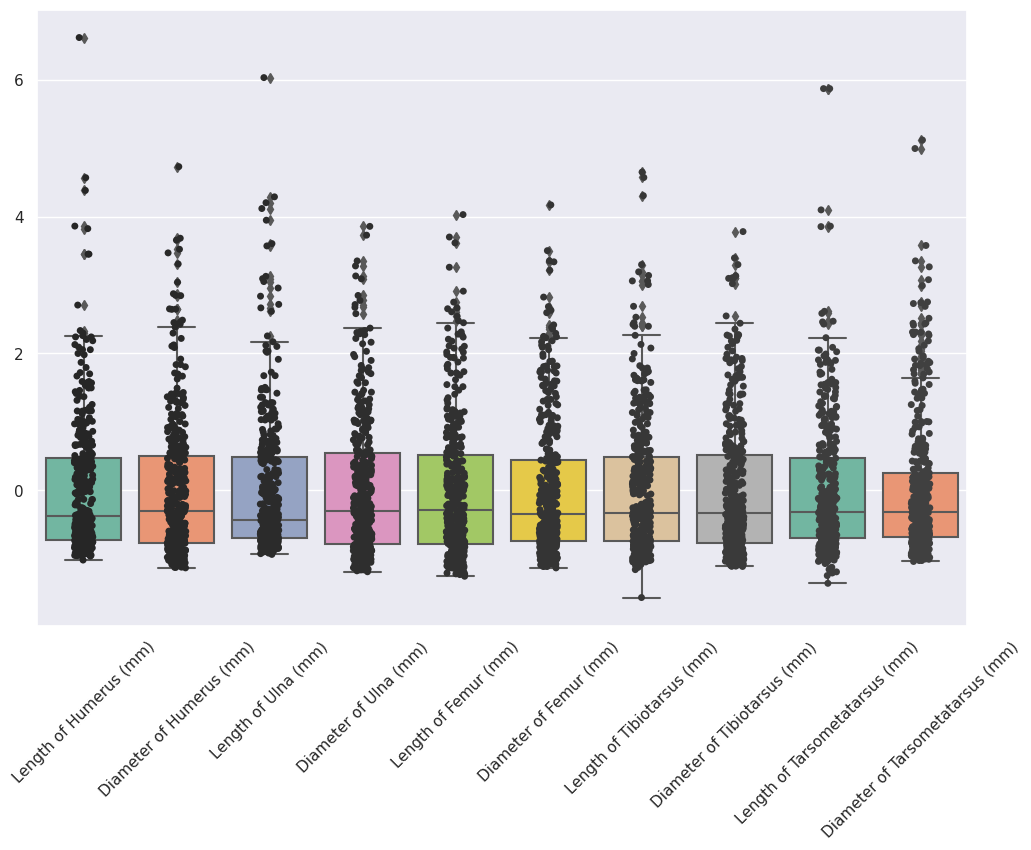

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Five Number Summary

In [ ]:
df.describe()

Length of Humerus (mm)  Diameter of Humerus (mm)  Length of Ulna (mm)  \
count            4.200000e+02                420.000000         4.200000e+02   
mean            -1.691768e-16                  0.000000        -1.353415e-16   
std              1.001193e+00                  1.001193         1.001193e+00   
min             -1.019292e+00                 -1.133552        -9.368095e-01   
25%             -7.334340e-01                 -0.764888        -6.969442e-01   
50%             -3.801839e-01                 -0.304937        -4.308591e-01   
75%              4.769246e-01                  0.504366         4.829093e-01   
max              6.616309e+00                  4.729949         6.030856e+00   

       Diameter of Ulna (mm)  Length of Femur (mm)  Diameter of Femur (mm)  \
count           4.200000e+02          4.200000e+02            4.200000e+02   
mean           -3.383537e-16         -8.458842e-17           -1.691768e-16   
std             1.001193e+00          1.001193e+00            1.001193e+00   
min            -1.190309e+00         -1.256311e+00           -1.133810e+00   
25%            -7.911139e-01         -7.790750e-01           -7.437740e-01   
50%            -2.978558e-01         -2.870233e-01           -3.463091e-01   
75%             5.395359e-01          5.150248e-01            4.473823e-01   
max             3.856984e+00          4.029070e+00            4.170674e+00   

       Length of Tibiotarsus (mm)  Diameter of Tibiotarsus (mm)  \
count                4.200000e+02                  4.200000e+02   
mean                -3.383537e-16                 -2.030122e-16   
std                  1.001193e+00                  1.001193e+00   
min                 -1.567195e+00                 -1.112974e+00   
25%                 -7.459193e-01                 -7.770138e-01   
50%                 -3.310055e-01                 -3.326799e-01   
75%                  4.843707e-01                  5.162508e-01   
max                  4.650877e+00                  3.780720e+00   

       Length of Tarsometatarsus (mm)  Diameter of Tarsometatarsus (mm)  
count                    4.200000e+02                      4.200000e+02  
mean                    -3.045183e-16                     -1.353415e-16  
std                      1.001193e+00                      1.001193e+00  
min                     -1.359253e+00                     -1.040183e+00  
25%                     -6.990184e-01                     -6.882363e-01  
50%                     -3.230229e-01                     -3.202402e-01  
75%                      4.730629e-01                      2.575482e-01  
max                      5.870149e+00                      5.118307e+00

### Pair Plot

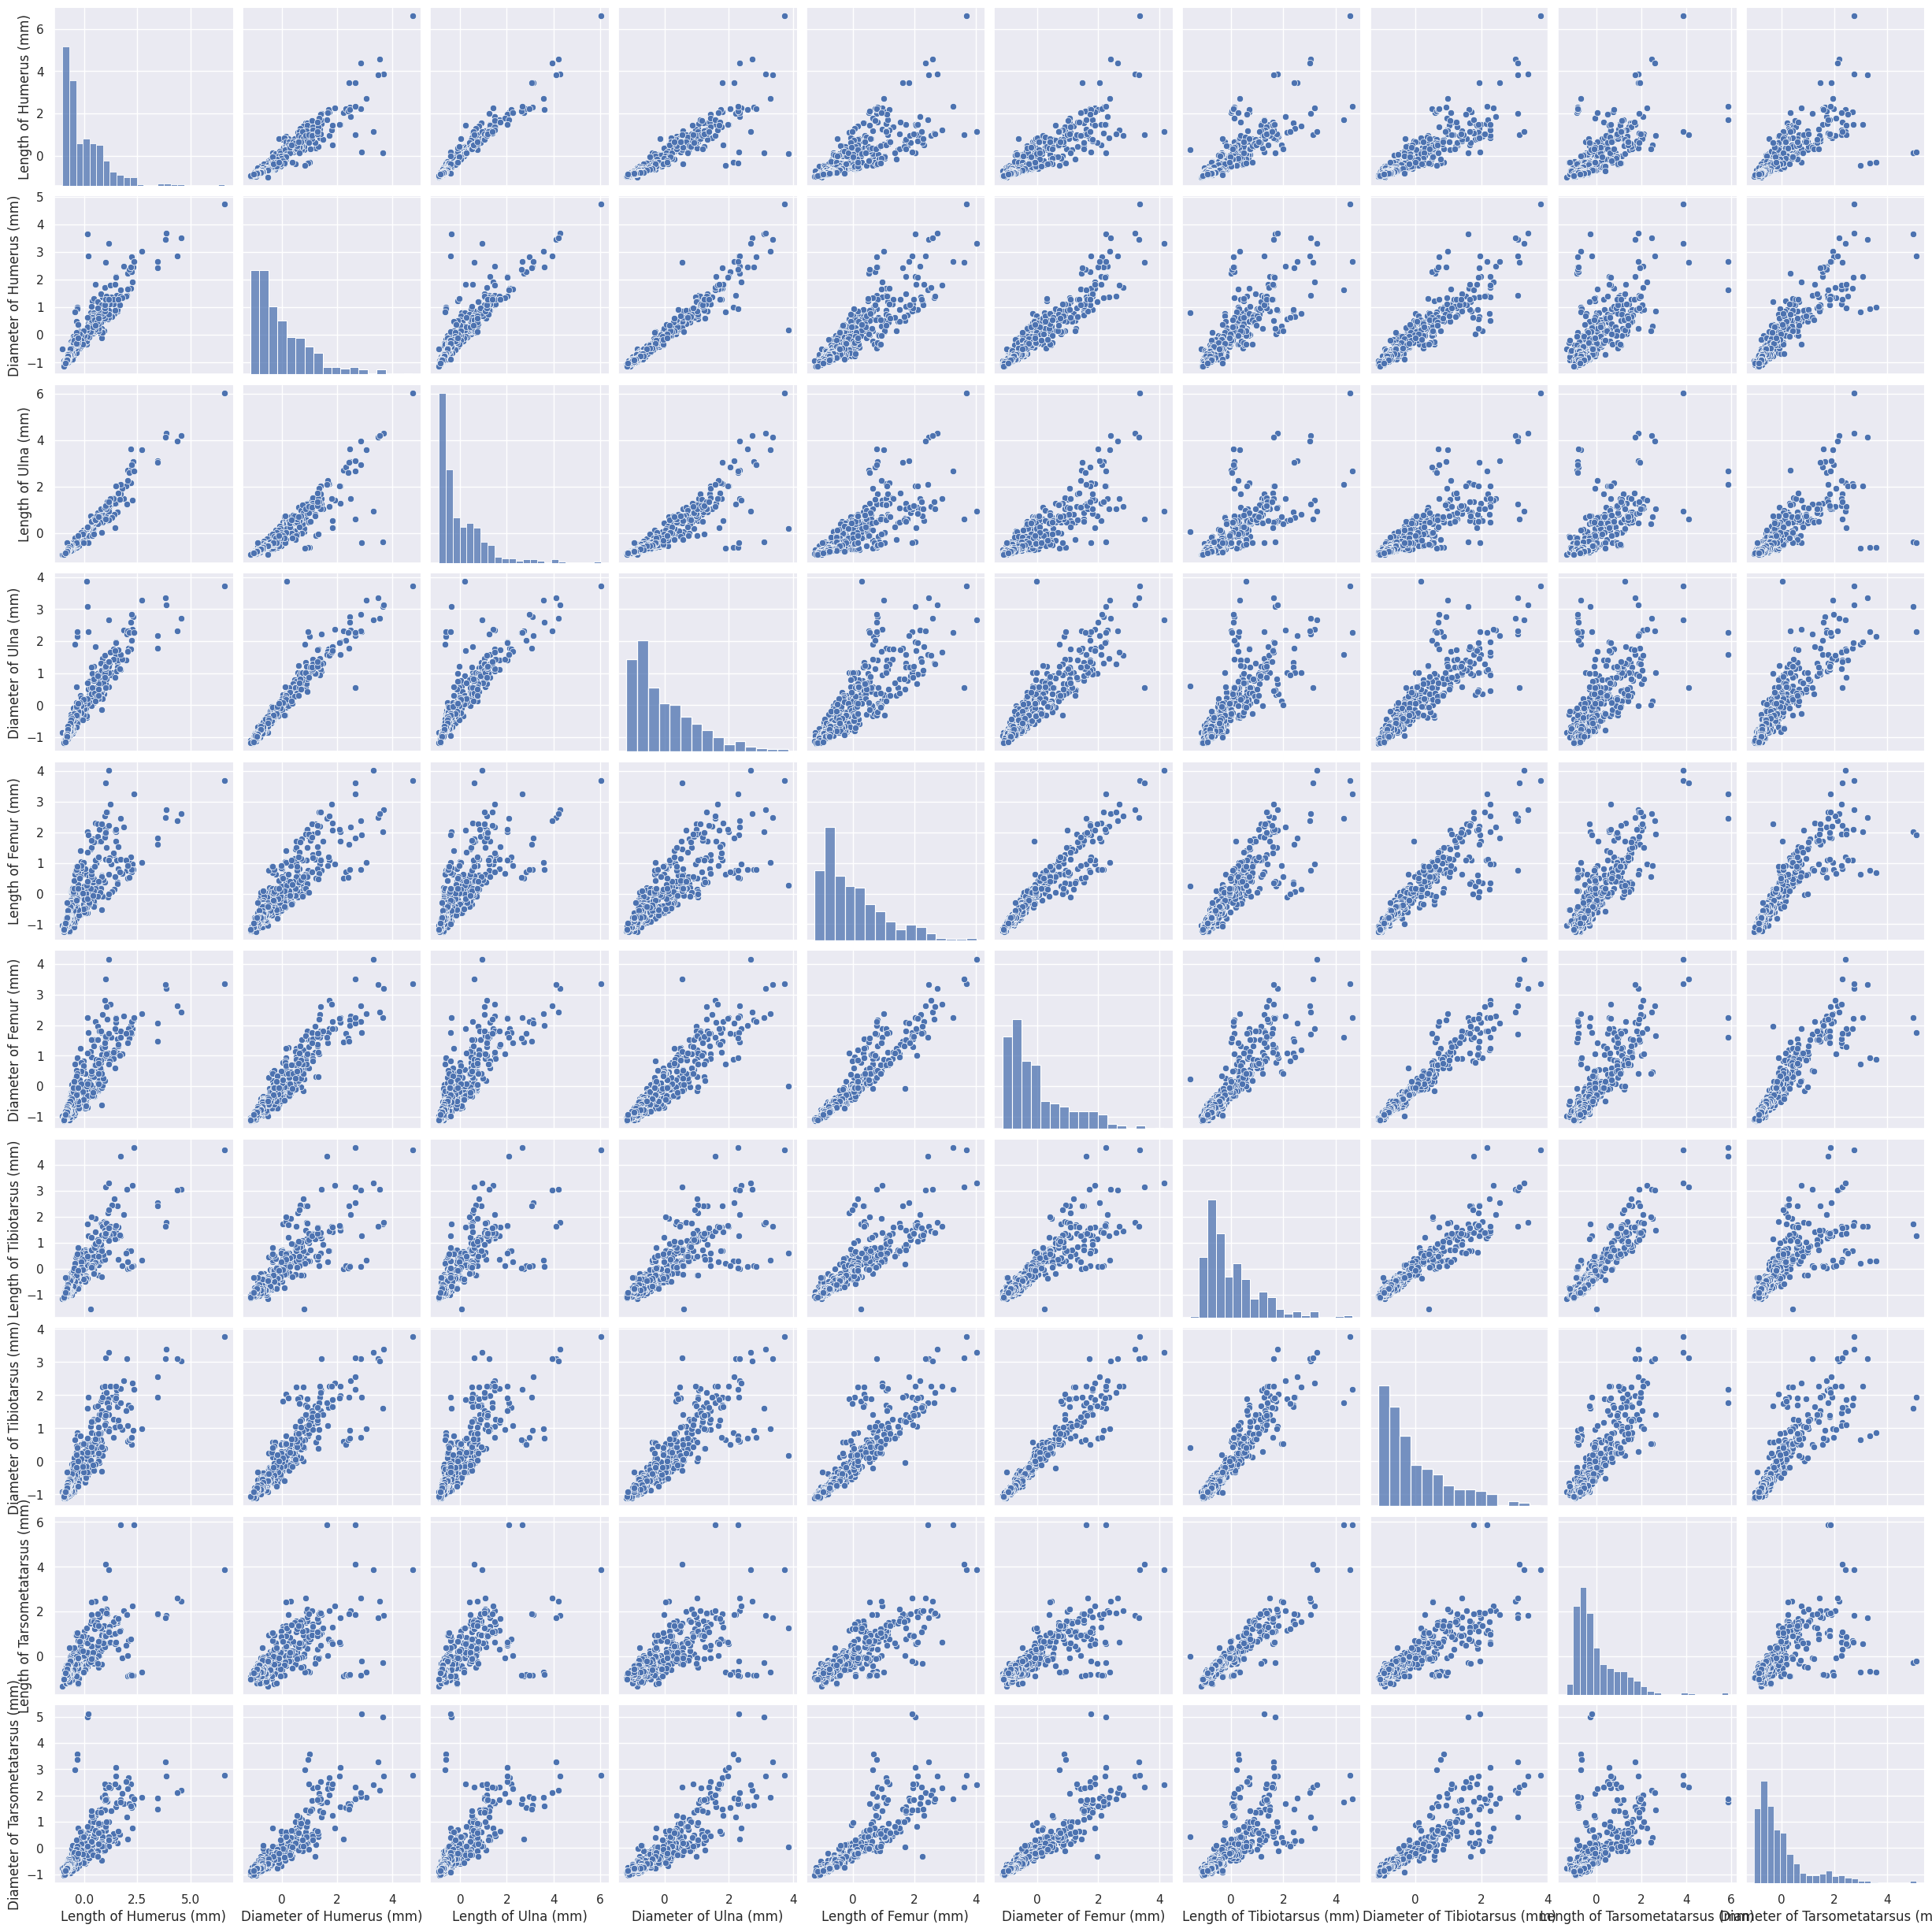

In [ ]:
sns.pairplot(df)

## **Covariance**

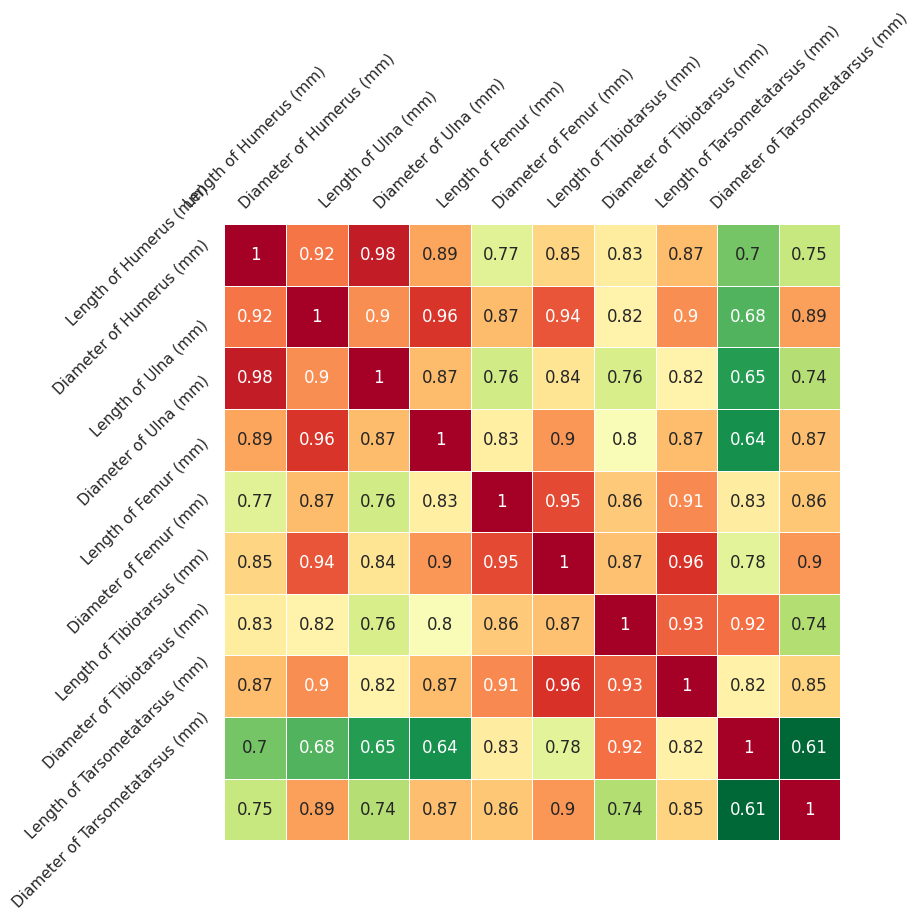

In [ ]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=45)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
#plt.title('Covariance matrix')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

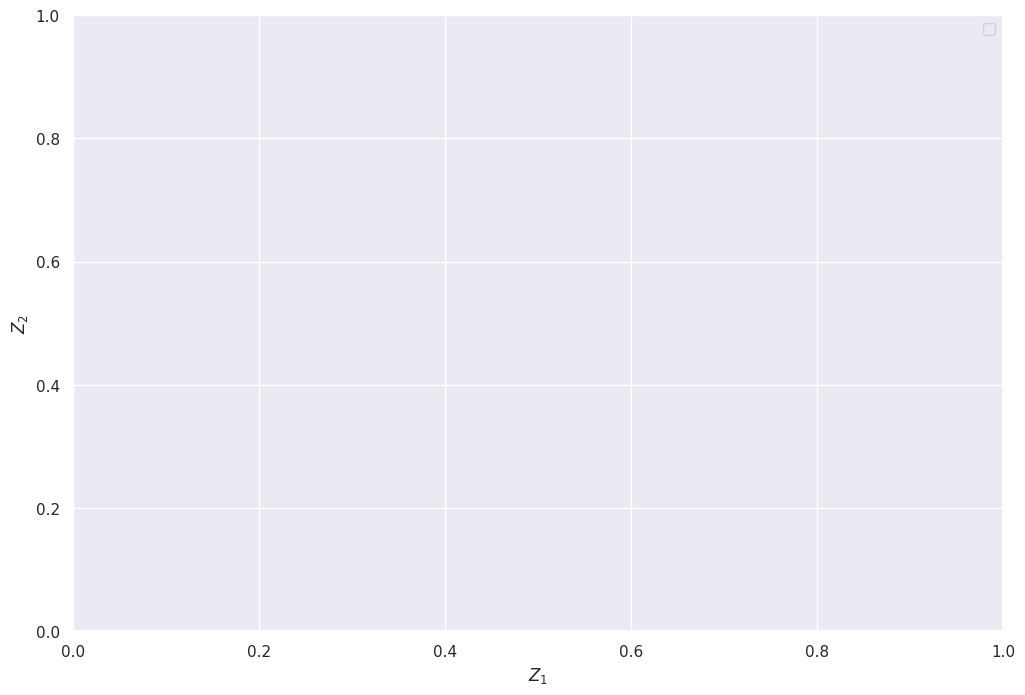

In [ ]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

plt. figure()

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

Eigenvector matrix:
[[ 0.31707287 -0.23073365 -0.4725326  -0.02989212 -0.17808513 -0.16708912
  -0.19437953 -0.08625534  0.36458393  0.61989375]
 [ 0.32950571 -0.26278369  0.0450288   0.05682109  0.1707044   0.19794286
  -0.32060866  0.76261569  0.14633751 -0.20737855]
 [ 0.30839502 -0.31253982 -0.47765883 -0.39688982 -0.03131701 -0.17575378
   0.15963397 -0.12794486 -0.34332664 -0.47951606]
 [ 0.32002616 -0.30378101  0.04458218  0.41325091  0.57869738  0.28230642
   0.2968985  -0.35510842  0.05093707  0.03322061]
 [ 0.31958177  0.19587679  0.32482989 -0.56954969  0.16121923  0.2488789
  -0.41672794 -0.36821249  0.17511951 -0.04191268]
 [ 0.33272222  0.00715736  0.22297311 -0.17101723 -0.29901141  0.36557297
   0.35126664  0.18973567 -0.49099861  0.43215953]
 [ 0.31524572  0.38885382 -0.16125768  0.47109628 -0.03606556 -0.07504295
  -0.49368478 -0.12441932 -0.48386591 -0.03484075]
 [ 0.33105638  0.13012584  0.06414215  0.2694074  -0.60723652  0.18566107
   0.20907542 -0.13361617  0.426

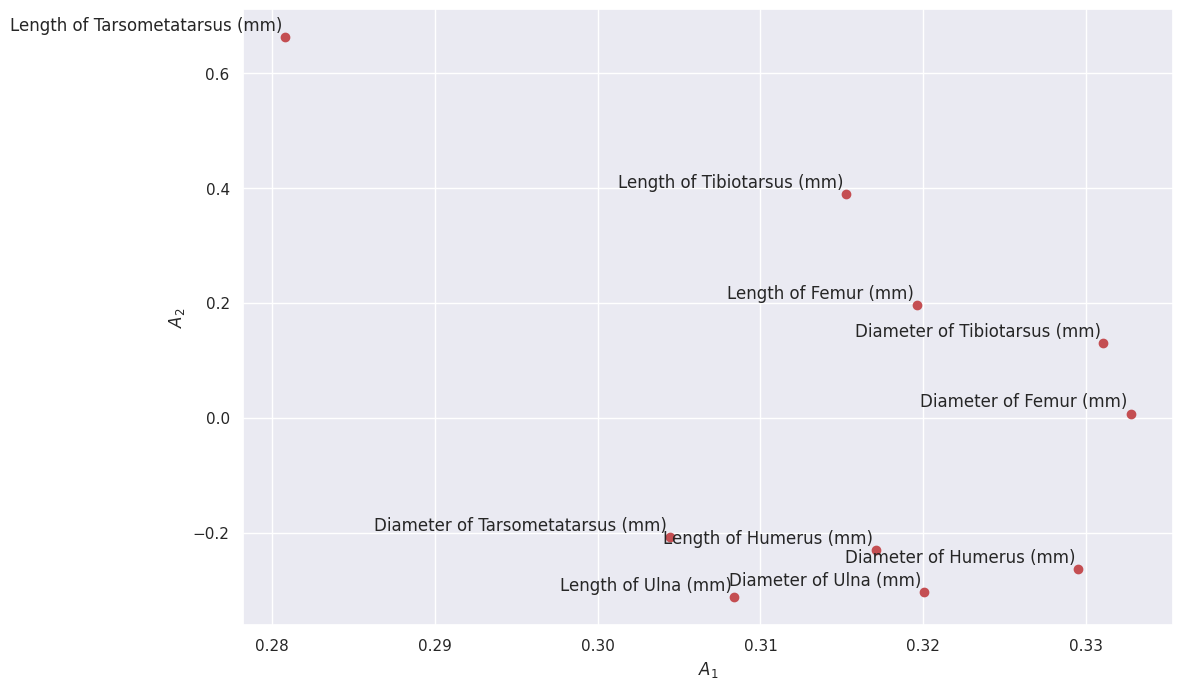

In [ ]:
A = pca.components_.T 
print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


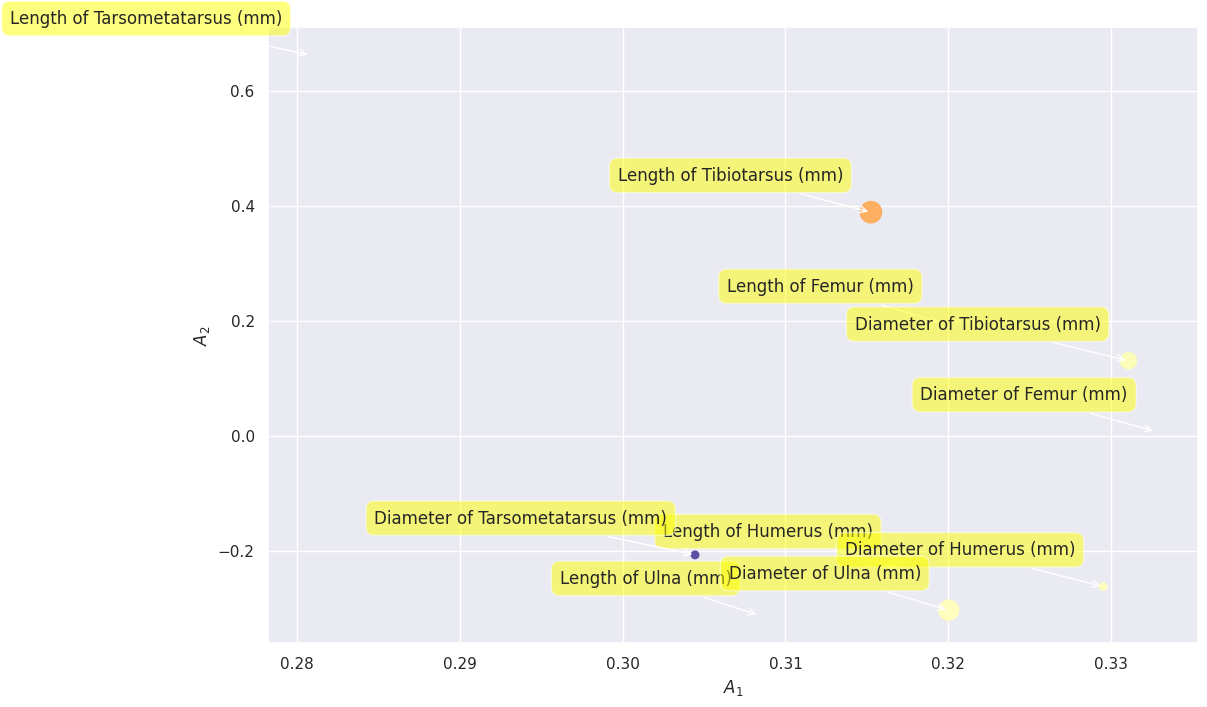

In [ ]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

Eigenvalues:
[8.55070325e+00 6.55190832e-01 4.26652930e-01 1.24572475e-01
 9.11889543e-02 8.09936868e-02 3.76982397e-02 2.92663039e-02
 1.95727367e-02 8.02693654e-03]


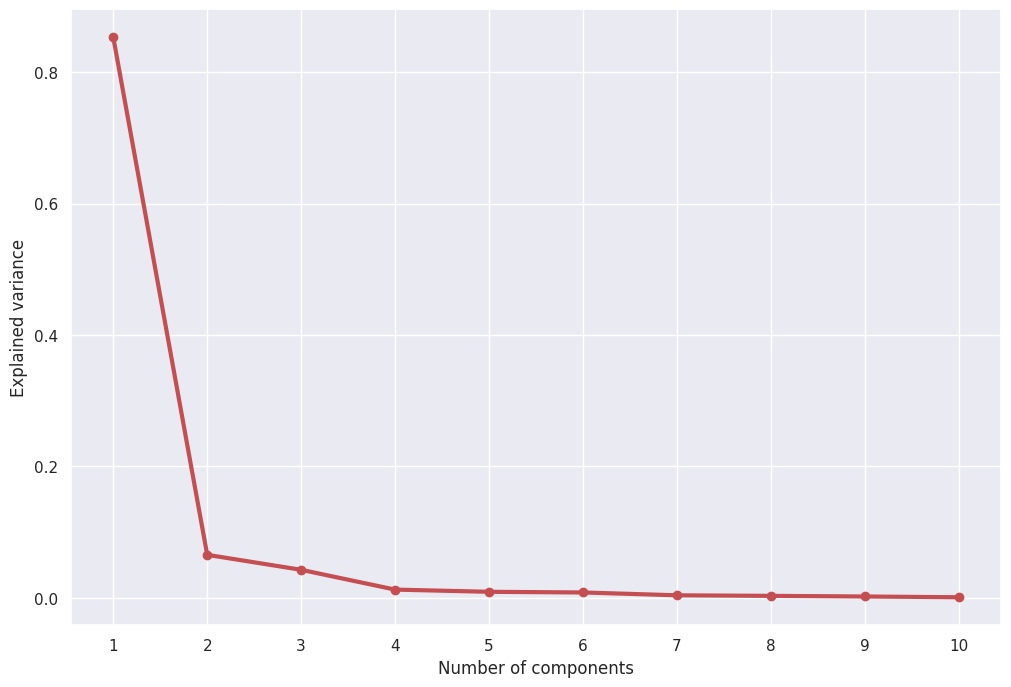

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()


### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

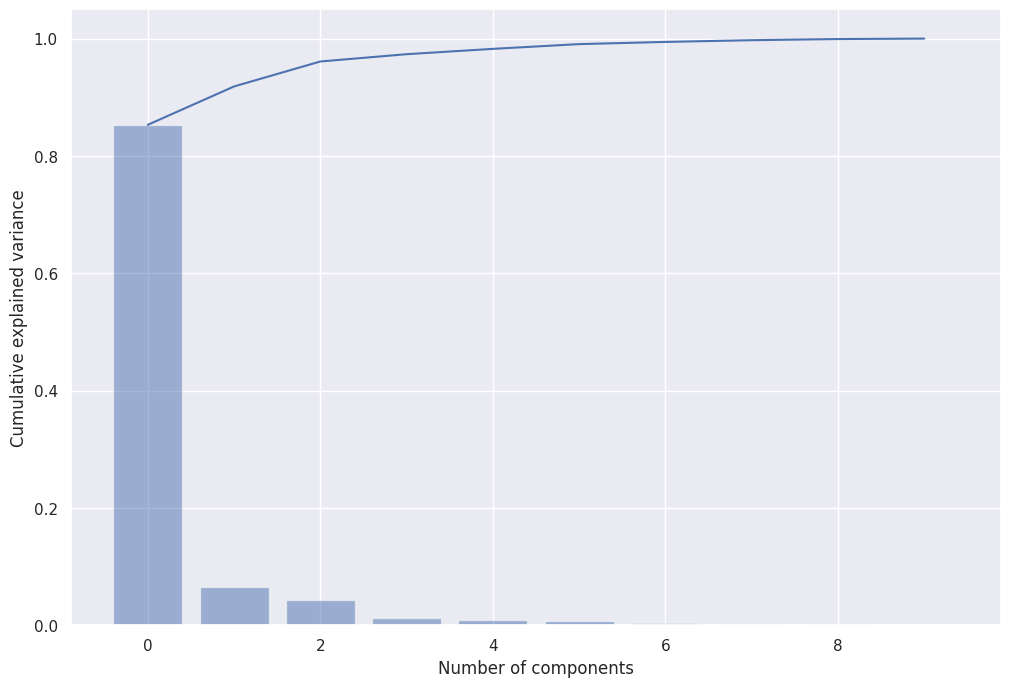

In [ ]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [ ]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (85.3%)',
 '1': 'PC 2 (6.5%)',
 '2': 'PC 3 (4.3%)',
 '3': 'PC 4 (1.2%)',
 '4': 'PC 5 (0.9%)',
 '5': 'PC 6 (0.8%)',
 '6': 'PC 7 (0.4%)',
 '7': 'PC 8 (0.3%)',
 '8': 'PC 9 (0.2%)',
 '9': 'PC 10 (0.1%)'}

### **Biplot**

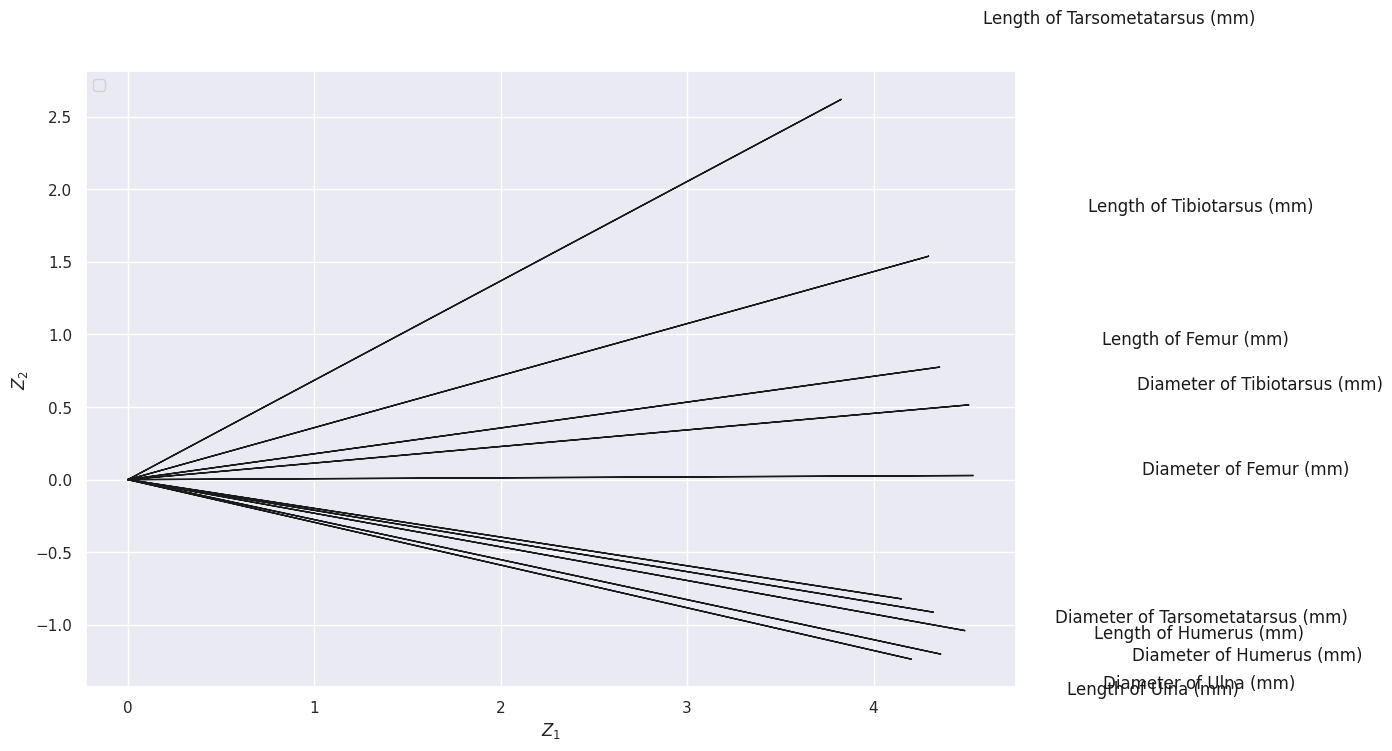

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

**Using PCA Librarry**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC                           feature   loading  type
0  PC1            Diameter of Femur (mm)  0.332722  best
1  PC2    Length of Tarsometatarsus (mm)  0.661912  best
2  PC3  Diameter of Tarsometatarsus (mm)  0.568356  best
3  PC3            Length of Humerus (mm) -0.472533  weak
4  PC1          Diameter of Humerus (mm)  0.329506  weak
5  PC3               Length of Ulna (mm) -0.477659  weak
6  PC1             Diameter of Ulna (mm)  0.320026  weak
7  PC3              Length of Femur (mm)  0.324830  weak
8  PC2        Length of Tibiotarsus (mm)  0.388854  weak
9  PC1      Diameter of Tibiotarsus (mm)  0.331056  weak


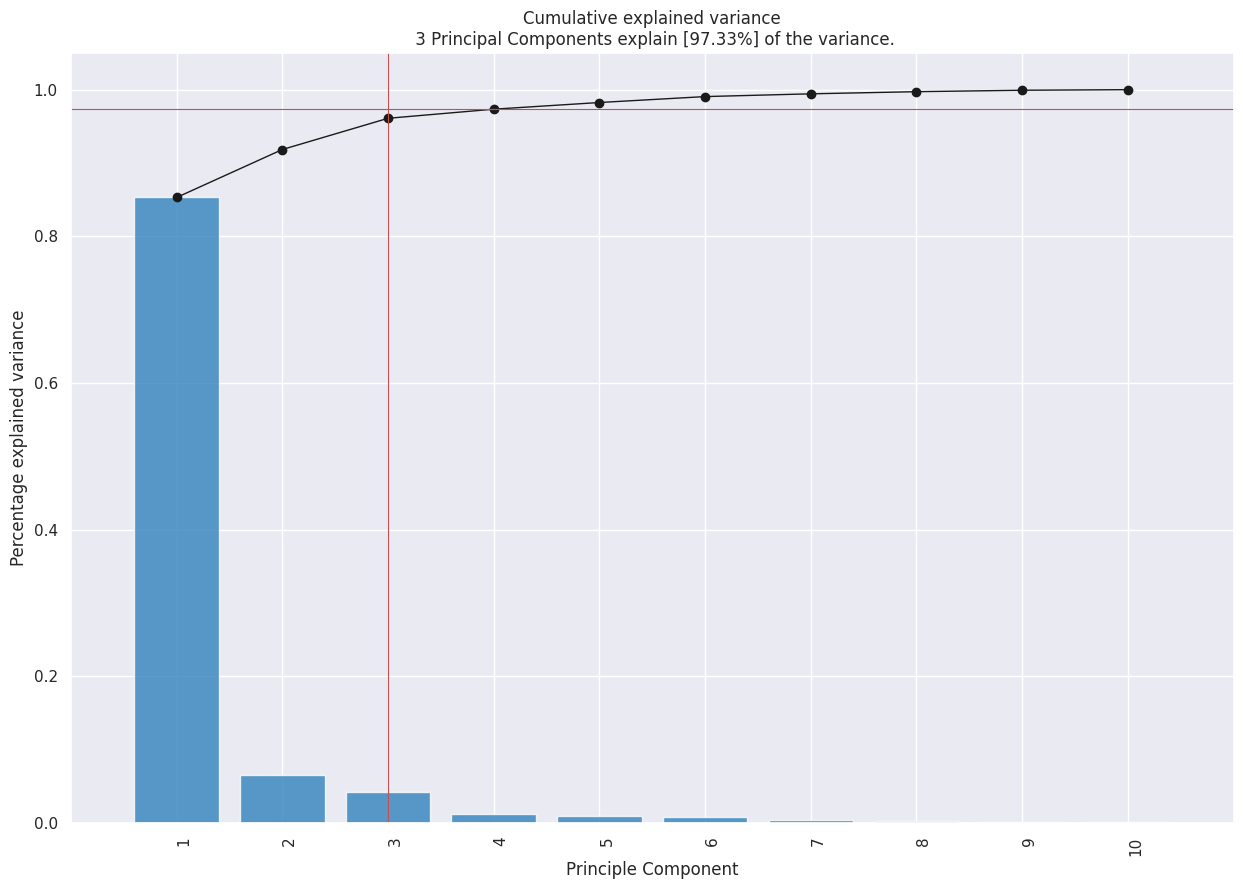

<Figure size 1200x800 with 0 Axes>

In [ ]:
model.plot();

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


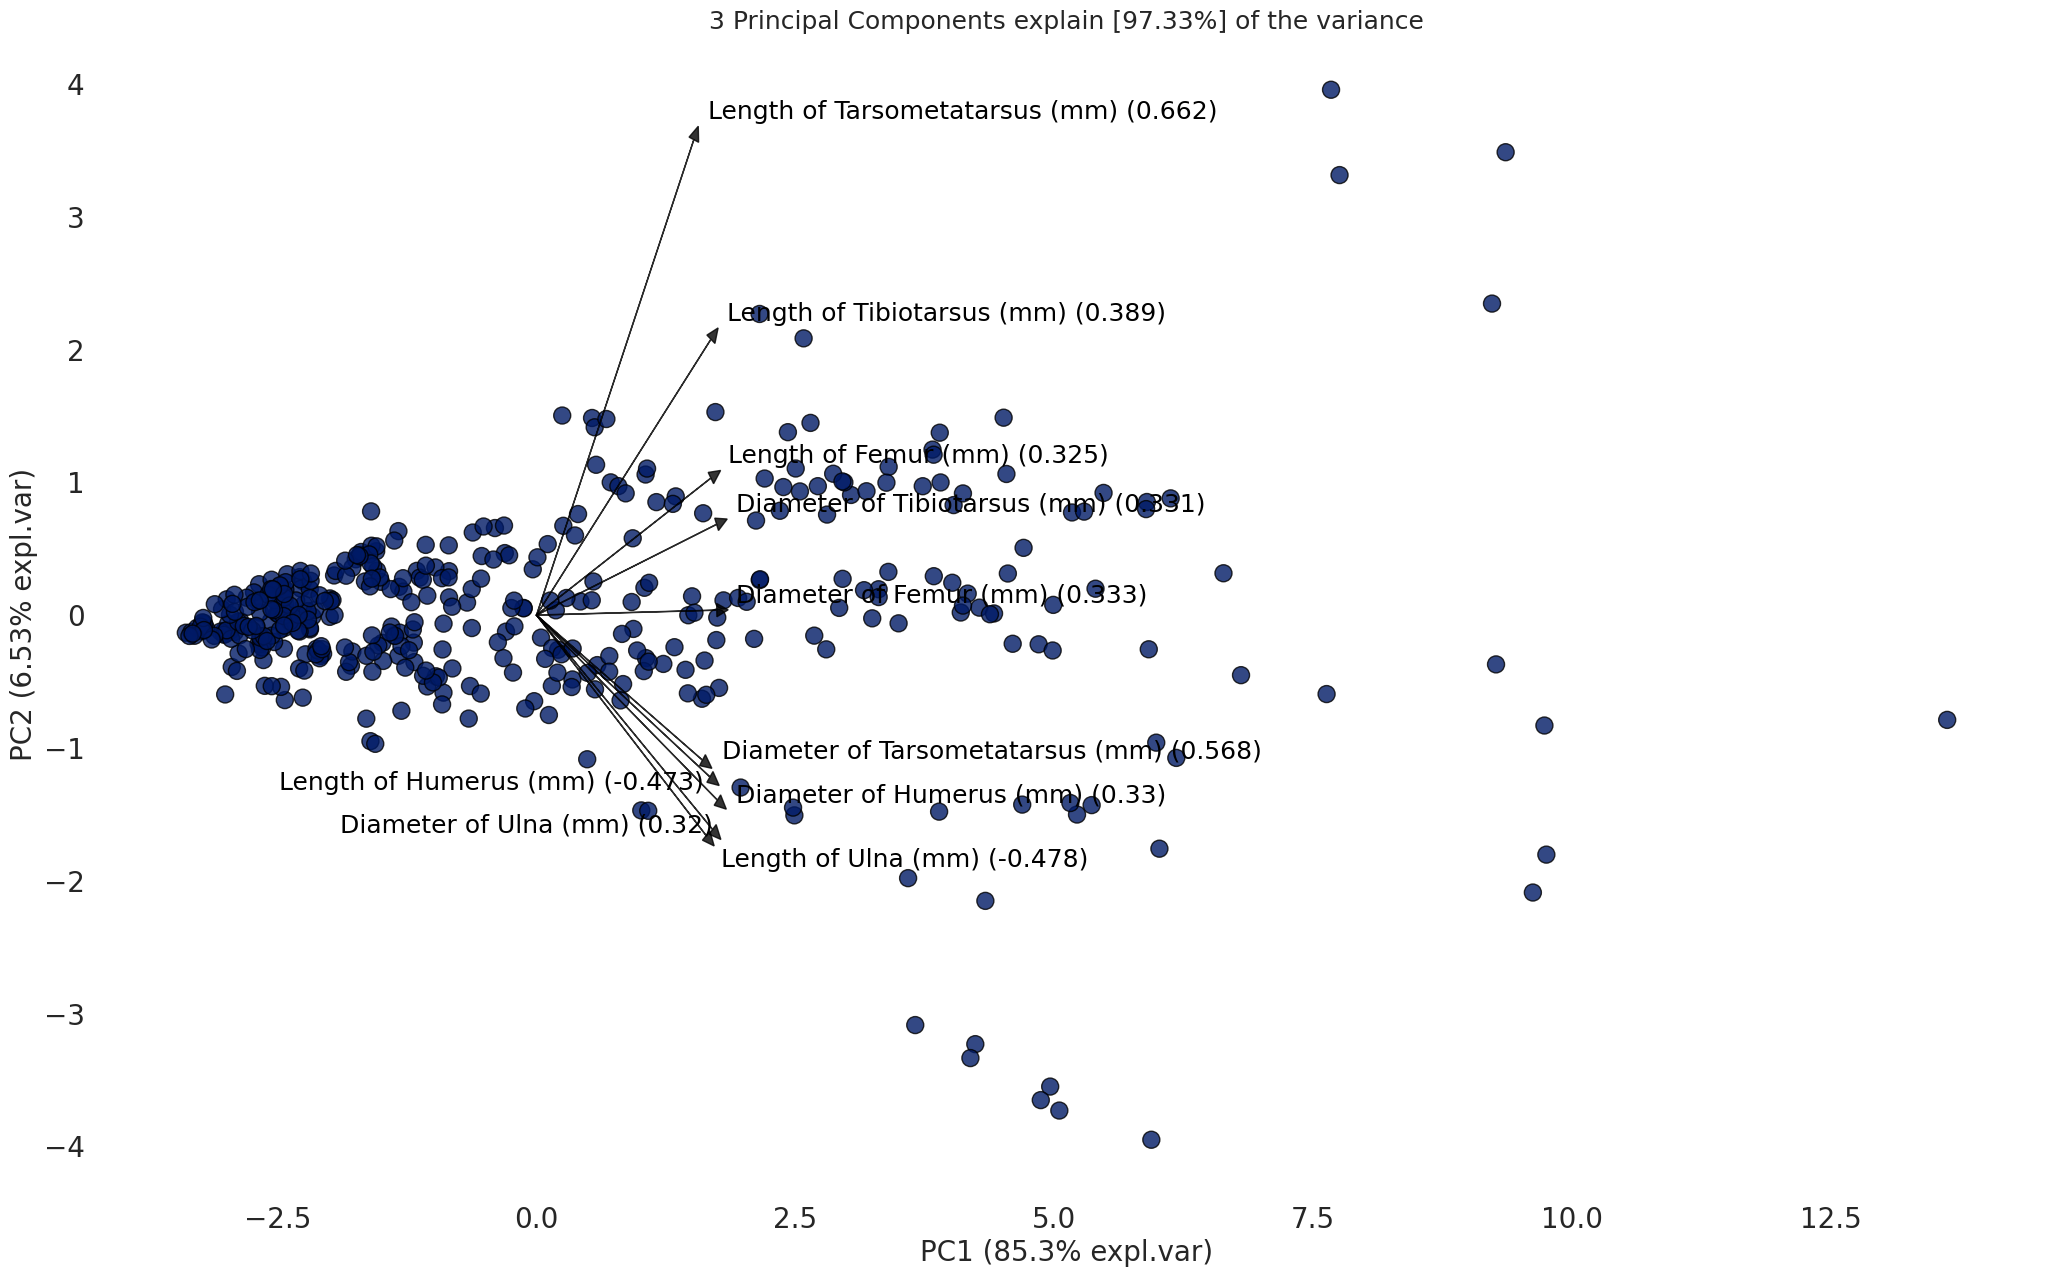

In [ ]:
 ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.


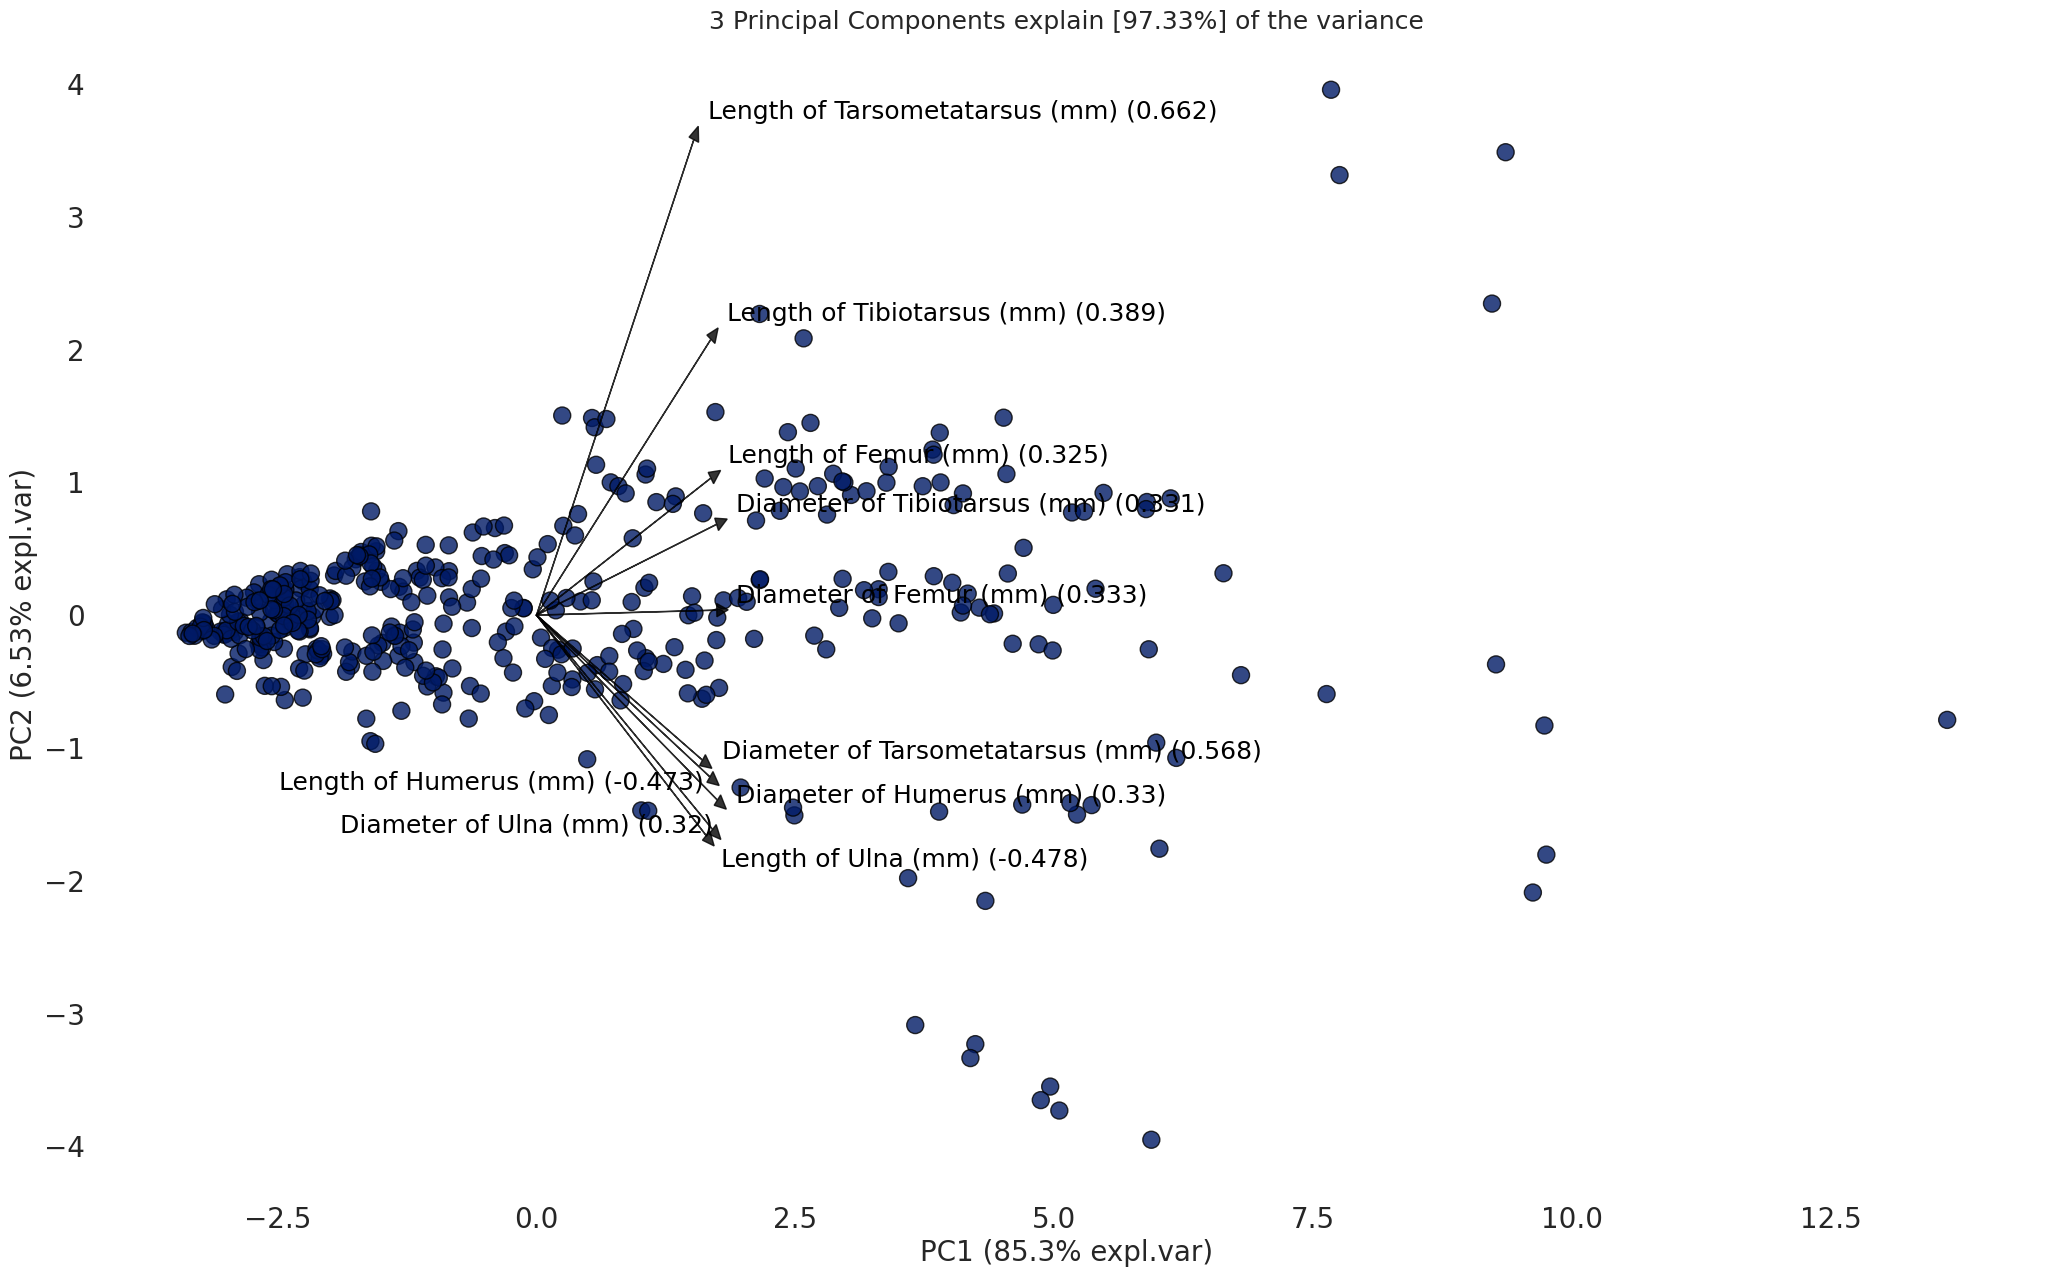

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [97.33%] of the variance'}, xlabel='PC1 (85.3% expl.var)', ylabel='PC2 (6.53% expl.var)'>)

In [140]:
model.biplot(legend=False)

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


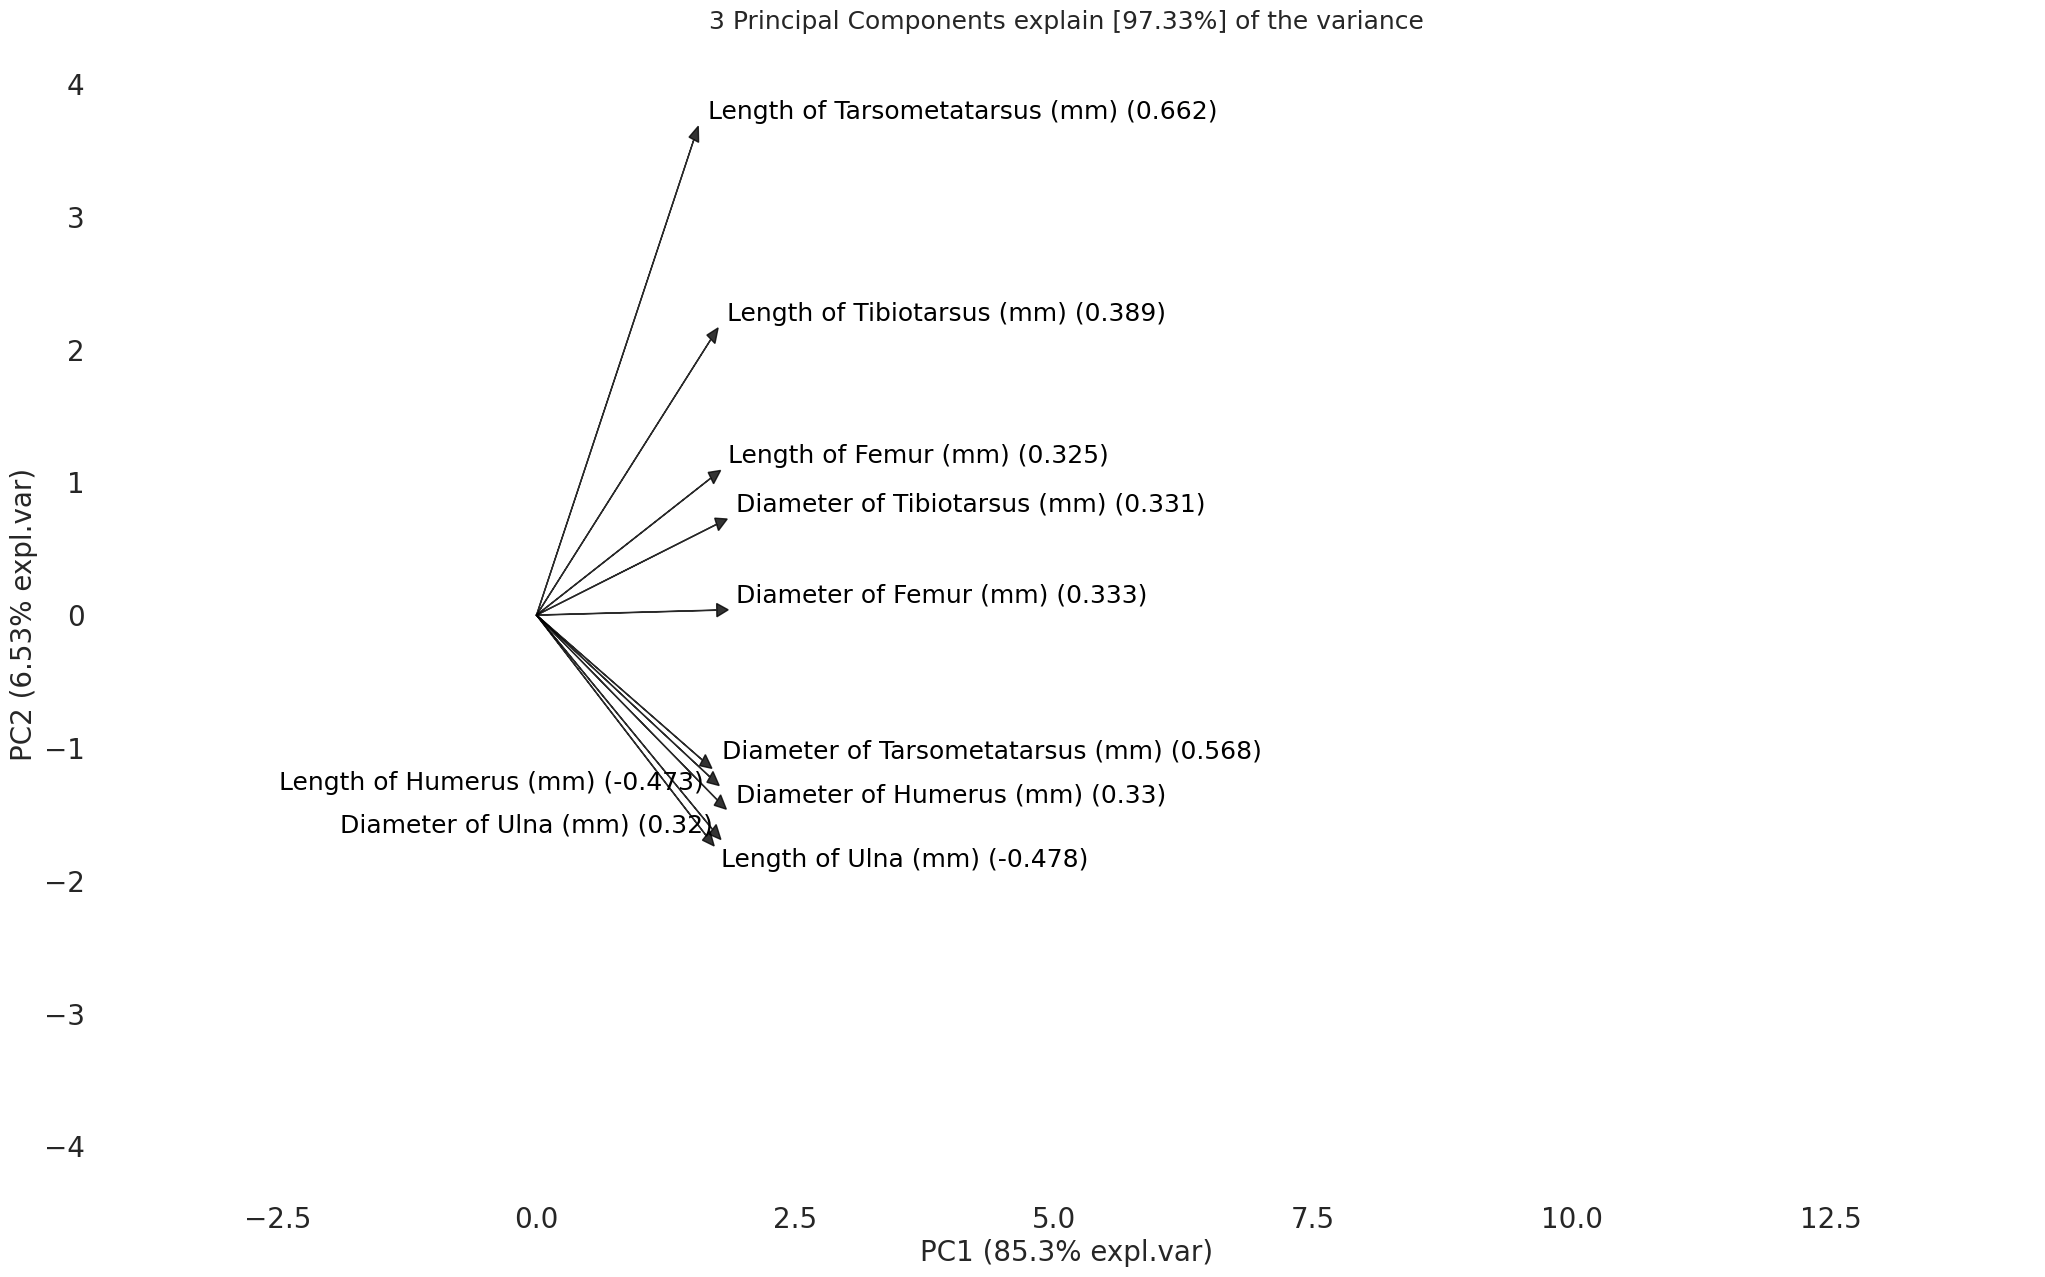

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [97.33%] of the variance'}, xlabel='PC1 (85.3% expl.var)', ylabel='PC2 (6.53% expl.var)'>)

In [141]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


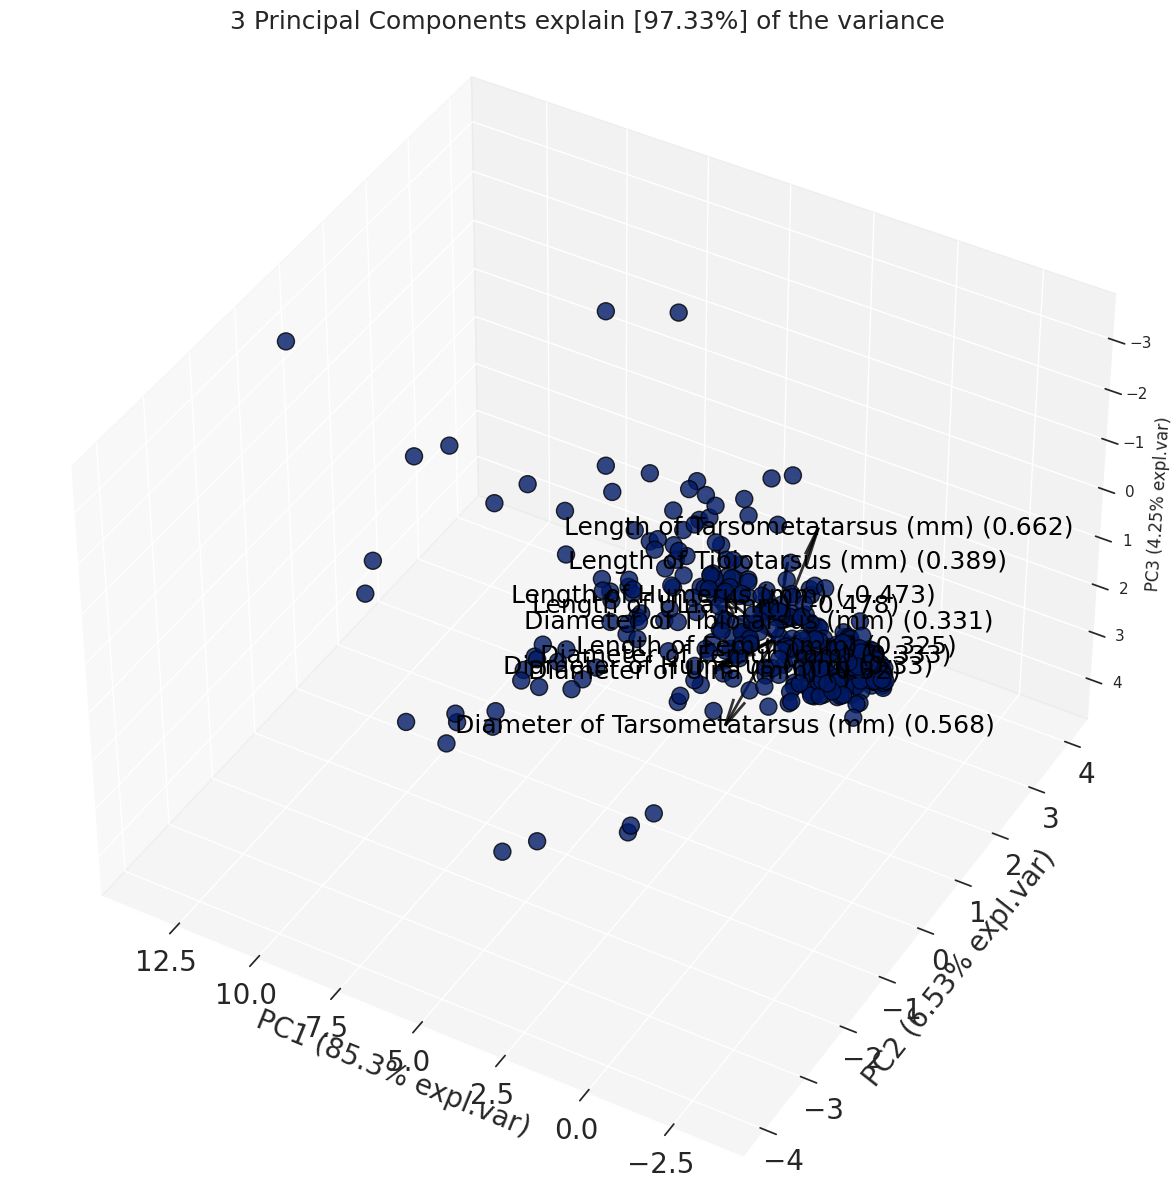

In [142]:
ax = model.biplot3d(legend=False)

### **Principal components**

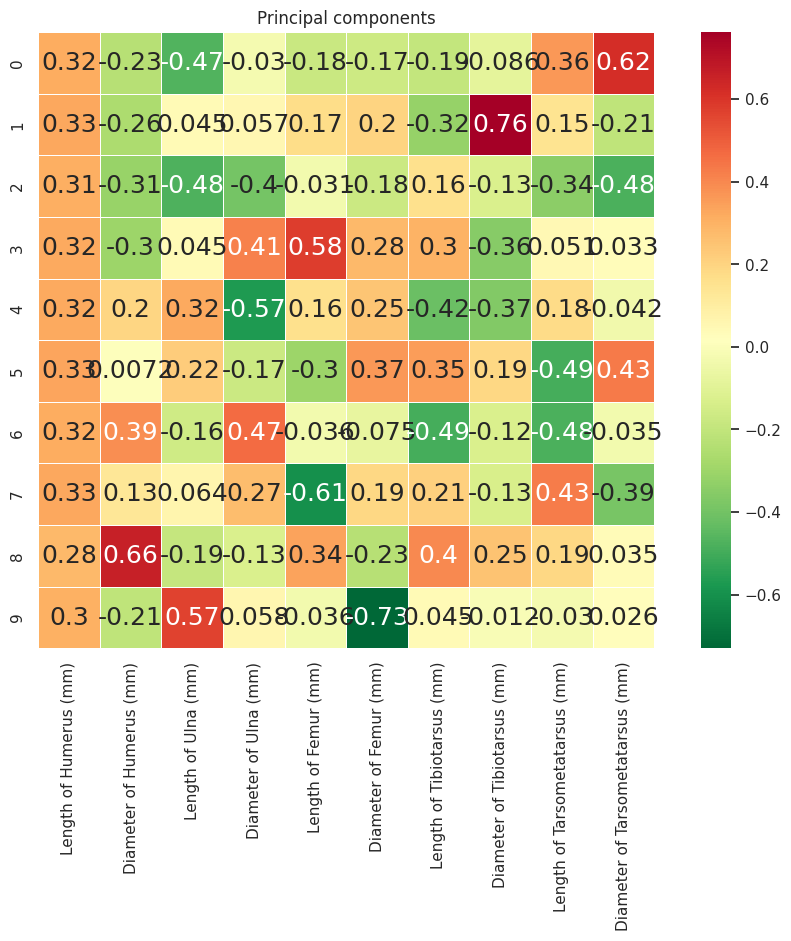

PC1:[0.31707287 0.32950571 0.30839502 0.32002616 0.31958177 0.33272222
 0.31524572 0.33105638 0.28082449 0.30444931]
PC2:[-0.23073365 -0.26278369 -0.31253982 -0.30378101  0.19587679  0.00715736
  0.38885382  0.13012584  0.6619122  -0.20749927]


In [143]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
#ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

### **Hotelling's T2 test**

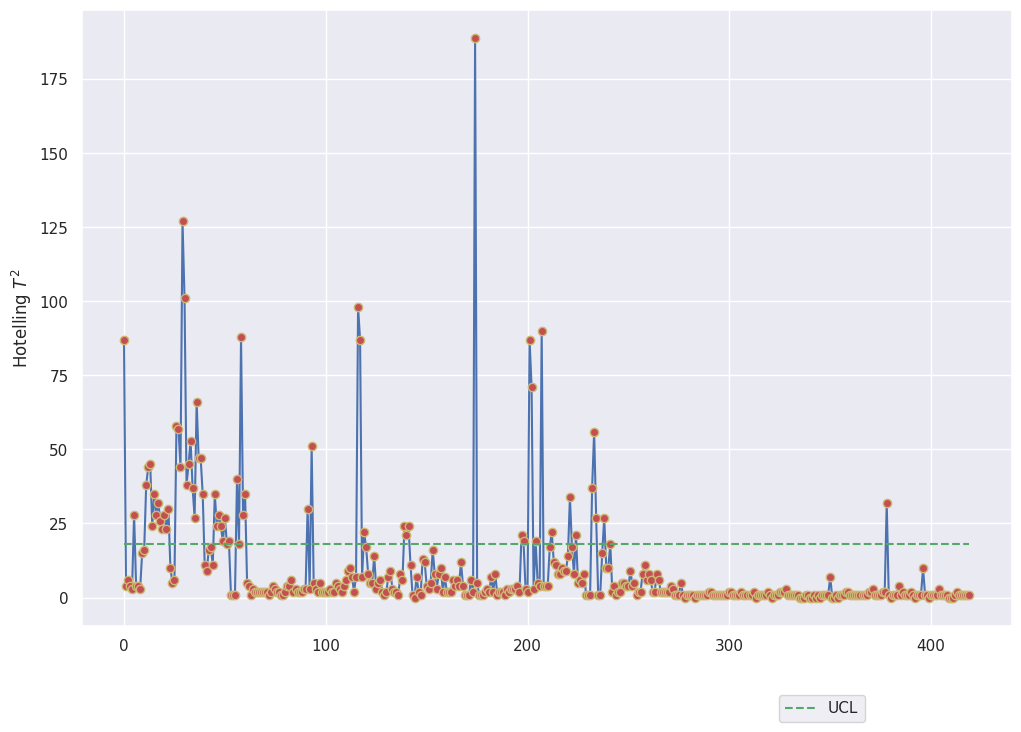

In [144]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [145]:
print(np.argwhere(Tsquare>UCL))

[[  0]
 [  5]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 52]
 [ 56]
 [ 58]
 [ 59]
 [ 60]
 [ 91]
 [ 93]
 [116]
 [117]
 [119]
 [139]
 [140]
 [141]
 [174]
 [197]
 [198]
 [201]
 [202]
 [204]
 [207]
 [212]
 [221]
 [224]
 [232]
 [233]
 [234]
 [238]
 [378]]


### **Control Charts for Principal Components**

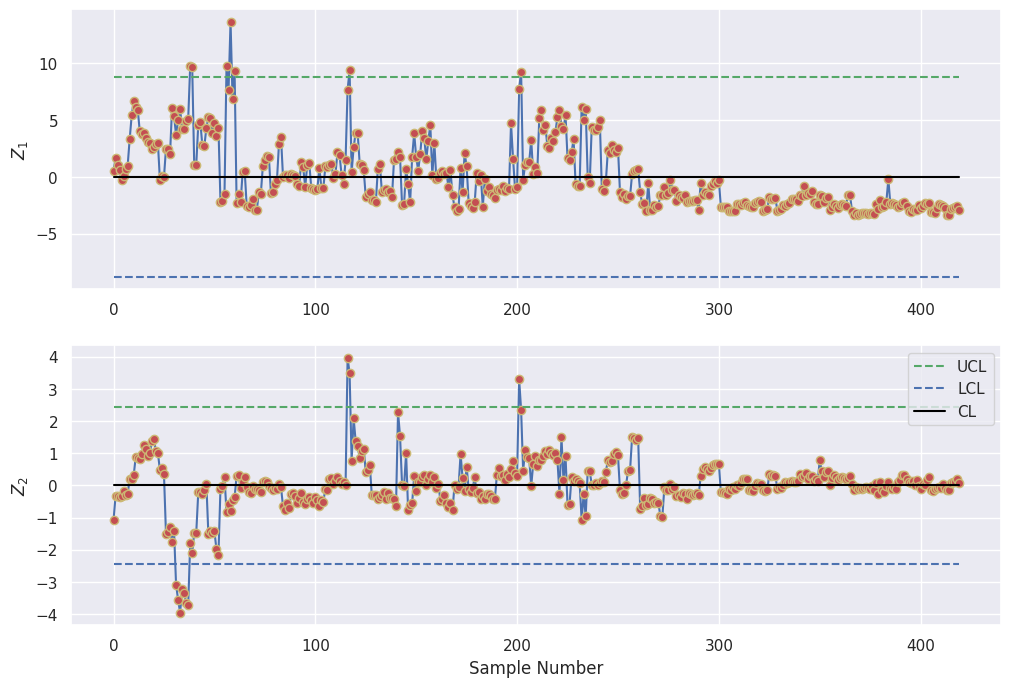

In [146]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [151]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[ 38]
 [ 39]
 [ 56]
 [ 58]
 [ 60]
 [117]
 [202]]
[[31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]]
[[116]
 [117]
 [201]]


## **Multi-Class Classification**

In [162]:
# Test-Train Split
# print(y.shape)
# print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0, stratify=y)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 294
Test Dataset Size: 126


### Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.818     0.257     0.391        35
           1      0.296     0.400     0.340        20
           2      0.000     0.000     0.000         7
           3      0.579     0.733     0.647        15
           4      0.095     0.182     0.125        11
           5      0.717     0.868     0.786        38

    accuracy                          0.500       126
   macro avg      0.418     0.407     0.382       126
weighted avg      0.568     0.500     0.488       126



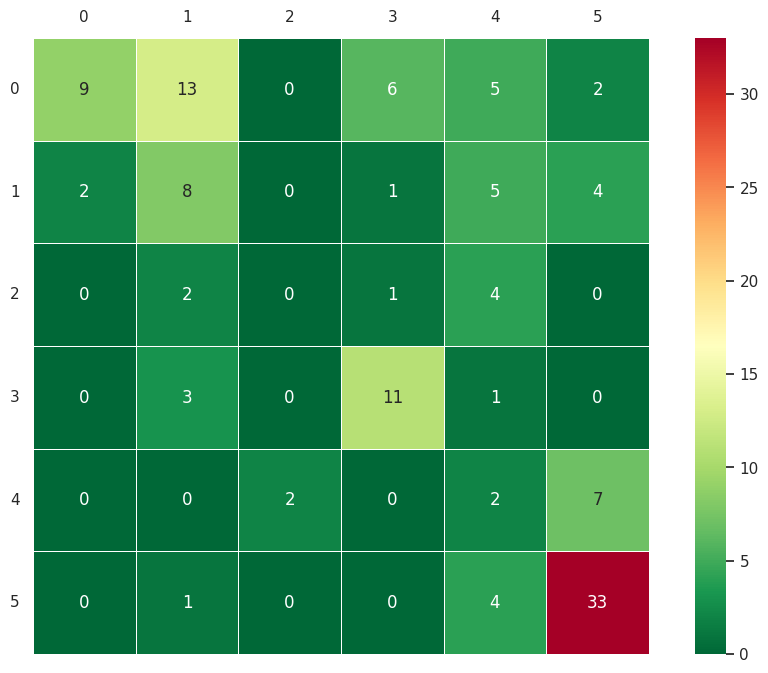

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.889     0.432     0.582        37
           1      0.448     0.619     0.520        21
           2      0.000     0.000     0.000         6
           3      0.733     0.846     0.786        13
           4      0.267     0.444     0.333         9
           5      0.771     0.925     0.841        40

    accuracy                          0.643       126
   macro avg      0.518     0.545     0.510       126
weighted avg      0.675     0.643     0.629       126



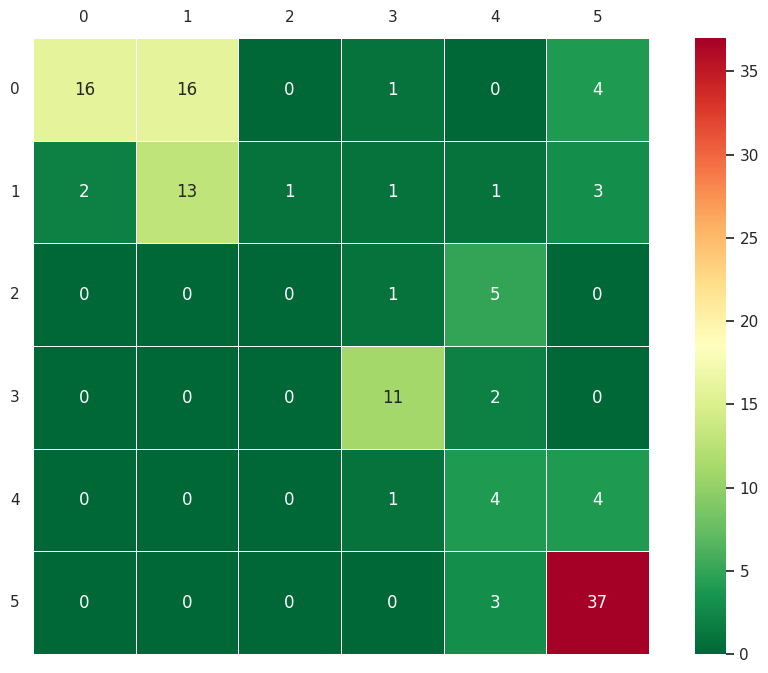

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.850     0.459     0.596        37
           1      0.556     0.238     0.333        21
           2      0.000     0.000     0.000         6
           3      0.310     0.692     0.429        13
           4      0.133     0.222     0.167         9
           5      0.679     0.900     0.774        40

    accuracy                          0.548       126
   macro avg      0.421     0.419     0.383       126
weighted avg      0.599     0.548     0.533       126



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


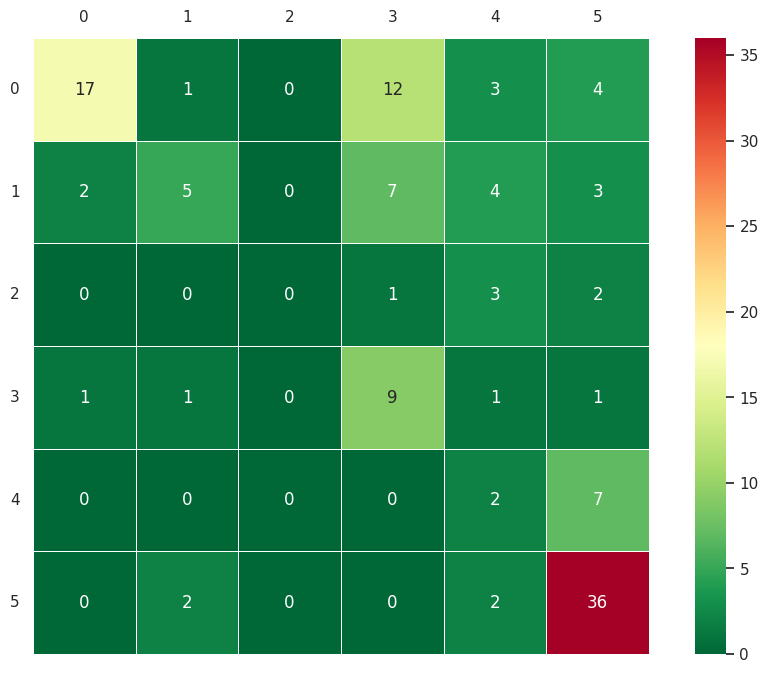

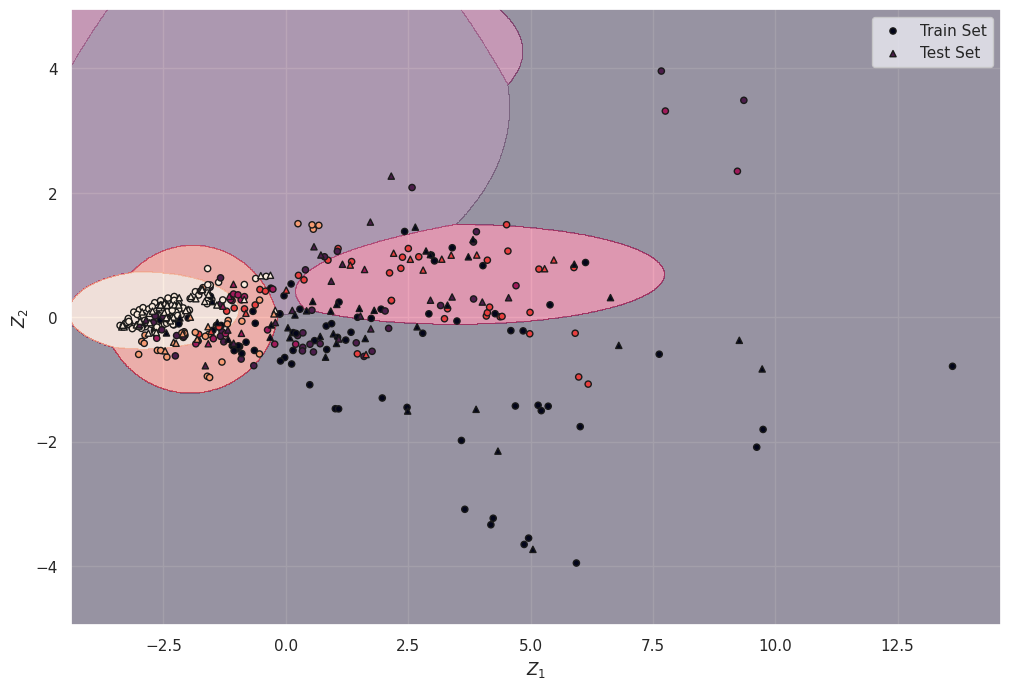

(array([  2,   4,   5,   6,   7,   8,  10,  11,  12,  15,  16,  20,  22,
        23,  27,  28,  29,  31,  32,  33,  34,  36,  38,  39,  42,  46,
        47,  48,  50,  52,  54,  60,  64,  65,  66,  77,  82,  85,  87,
        90,  91,  93,  94,  96,  97,  99, 100, 102, 104, 105, 106, 114,
       115, 118, 120, 121, 123]),)


In [163]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

Grid Search Results:
k_full_data: {'n_neighbors': 8}
k_Z: {'n_neighbors': 8}
k_Z12: {'n_neighbors': 8}
                                    0         1         2         3         4
knn_full_data fit_time       0.002776  0.002720  0.002632  0.002663  0.004291
knn_Z  fit_time              0.001752  0.001159  0.001142  0.001192  0.001147
knn_Z12 fit_time             0.001137  0.001114  0.001184  0.001235  0.001119
knn_full_data test_f1_macro  0.647538  0.568293  0.494449  0.608366  0.682262
knn_Z  test_f1_macro         0.658645  0.560259  0.570016  0.536463  0.634864
knn_Z12 test_f1_macro        0.504108  0.491187  0.349041  0.449634  0.474270

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.758     0.714     0.735        35
           1      0.400     0.300     0.343        20
           2      0.667     0.286     0.400         7
           3      0.778     0.933     0.848        15
           4      0.500     0.545    

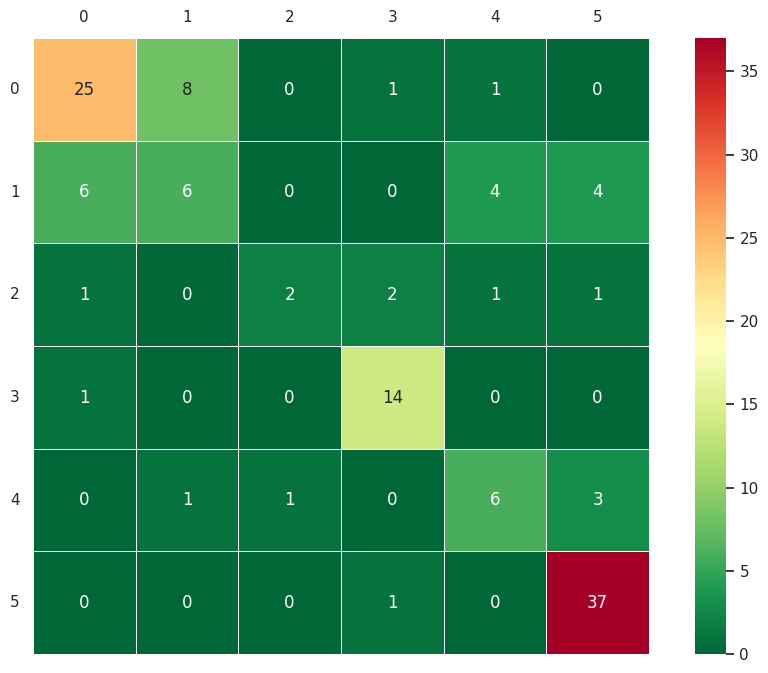

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.806     0.784     0.795        37
           1      0.727     0.381     0.500        21
           2      0.714     0.833     0.769         6
           3      0.611     0.846     0.710        13
           4      0.545     0.667     0.600         9
           5      0.837     0.900     0.867        40

    accuracy                          0.754       126
   macro avg      0.707     0.735     0.707       126
weighted avg      0.760     0.754     0.745       126



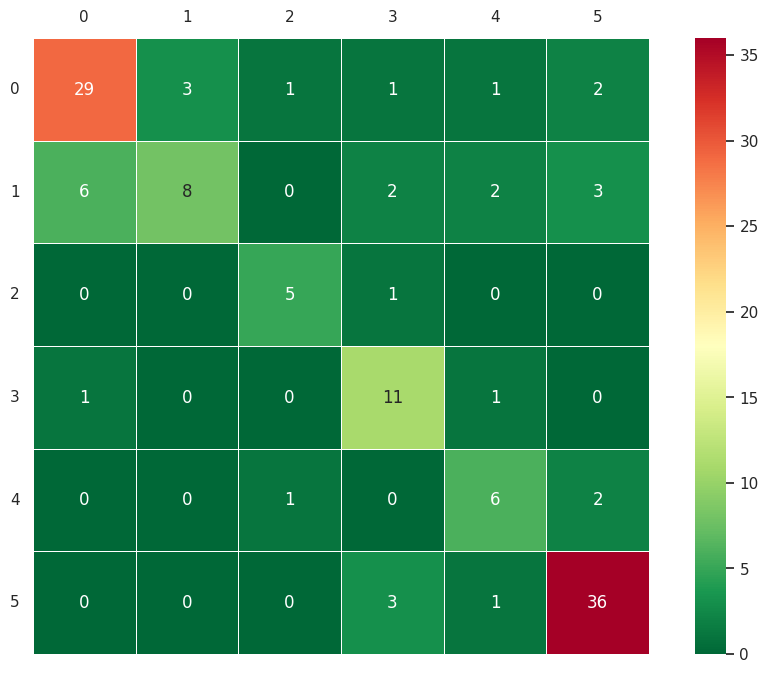

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.638     0.811     0.714        37
           1      0.300     0.143     0.194        21
           2      0.750     0.500     0.600         6
           3      0.438     0.538     0.483        13
           4      0.500     0.222     0.308         9
           5      0.822     0.925     0.871        40

    accuracy                          0.651       126
   macro avg      0.575     0.523     0.528       126
weighted avg      0.615     0.651     0.619       126



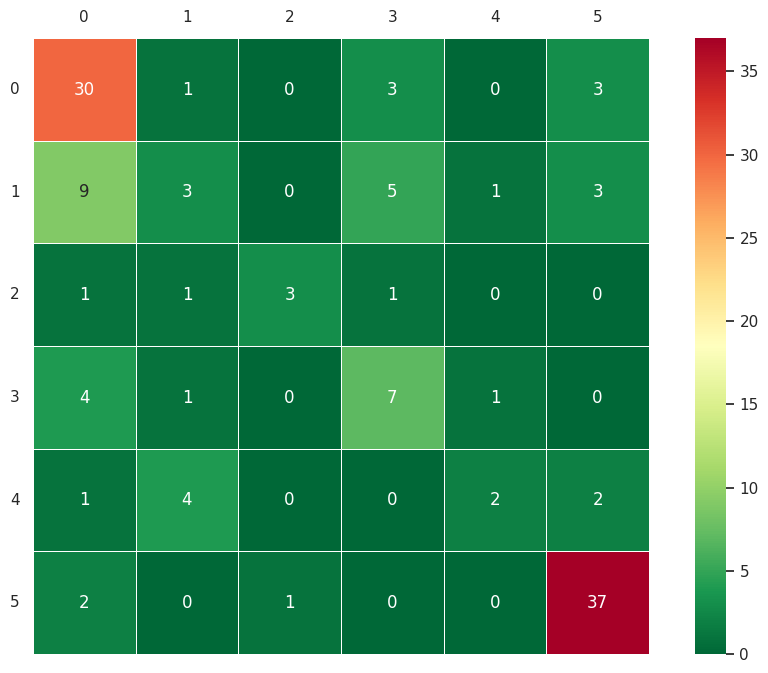

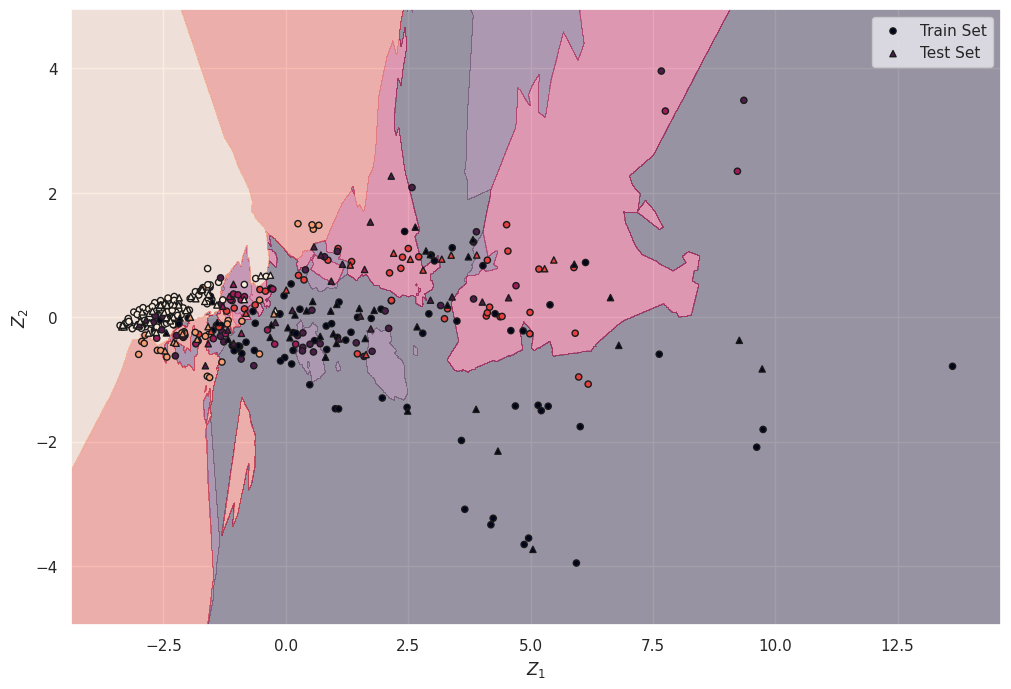

In [164]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

### Decision Trees (DT)

Grid Search Results:
depth_full_data: {'max_depth': 2}
depth_Z: {'max_depth': 2}
depth_Z12: {'max_depth': 2}
                                   0         1         2         3         4
dt_full_data fit_time       0.002998  0.002849  0.002881  0.002984  0.005339
dt_Z  fit_time              0.001719  0.001862  0.001629  0.001591  0.001572
dt_Z12 fit_time             0.002936  0.001609  0.001256  0.001154  0.001251
dt_full_data test_f1_macro  0.330421  0.286966  0.319902  0.327102  0.303375
dt_Z  test_f1_macro         0.421083  0.391111  0.485504  0.403792  0.431250
dt_Z12 test_f1_macro        0.400289  0.393613  0.352807  0.320906  0.430477

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.566     0.857     0.682        35
           1      0.000     0.000     0.000        20
           2      0.000     0.000     0.000         7
           3      0.000     0.000     0.000        15
           4      0.229     0.727     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


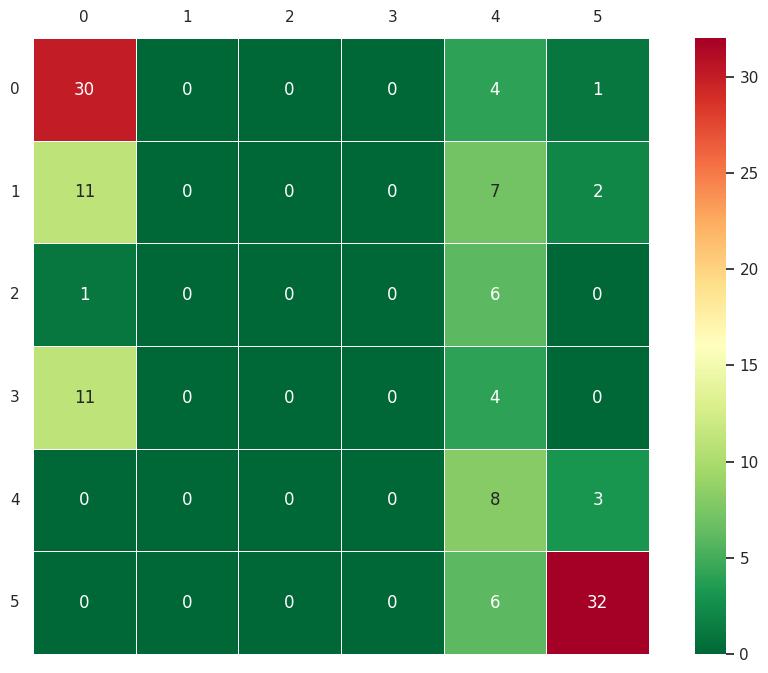

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.625     0.676     0.649        37
           1      0.000     0.000     0.000        21
           2      0.000     0.000     0.000         6
           3      0.265     0.692     0.383        13
           4      0.455     0.556     0.500         9
           5      0.805     0.825     0.815        40

    accuracy                          0.571       126
   macro avg      0.358     0.458     0.391       126
weighted avg      0.499     0.571     0.525       126



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


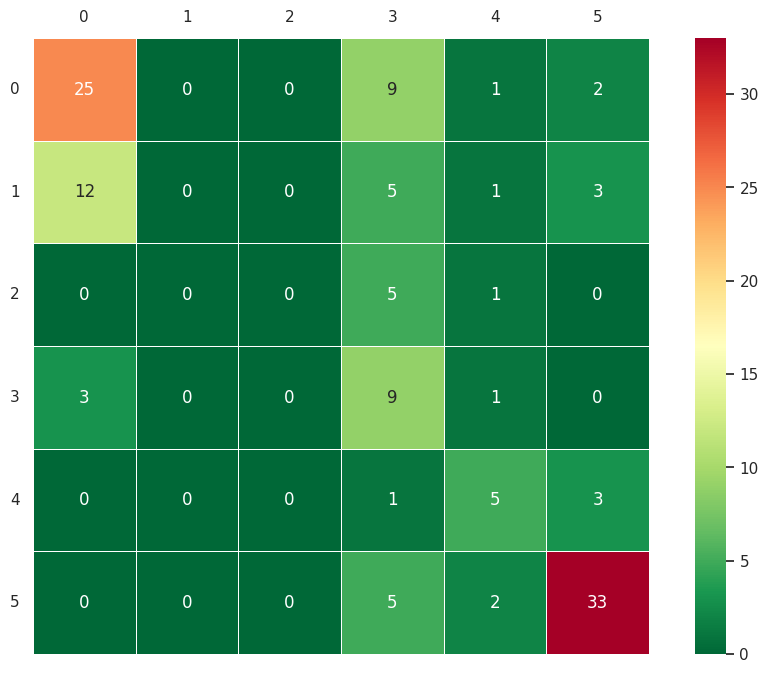

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.731     0.514     0.603        37
           1      0.000     0.000     0.000        21
           2      0.000     0.000     0.000         6
           3      0.229     0.846     0.361        13
           4      0.455     0.556     0.500         9
           5      0.805     0.825     0.815        40

    accuracy                          0.540       126
   macro avg      0.370     0.457     0.380       126
weighted avg      0.526     0.540     0.509       126



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


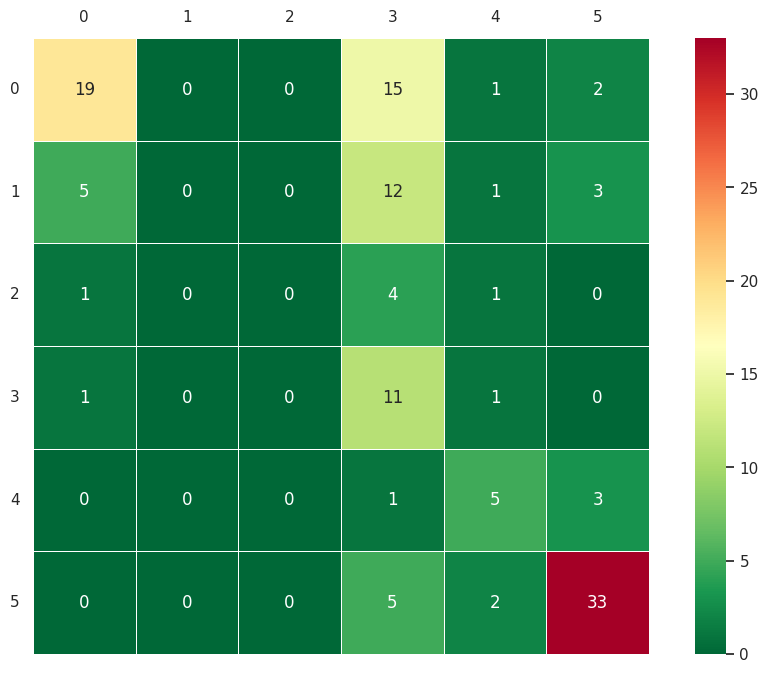

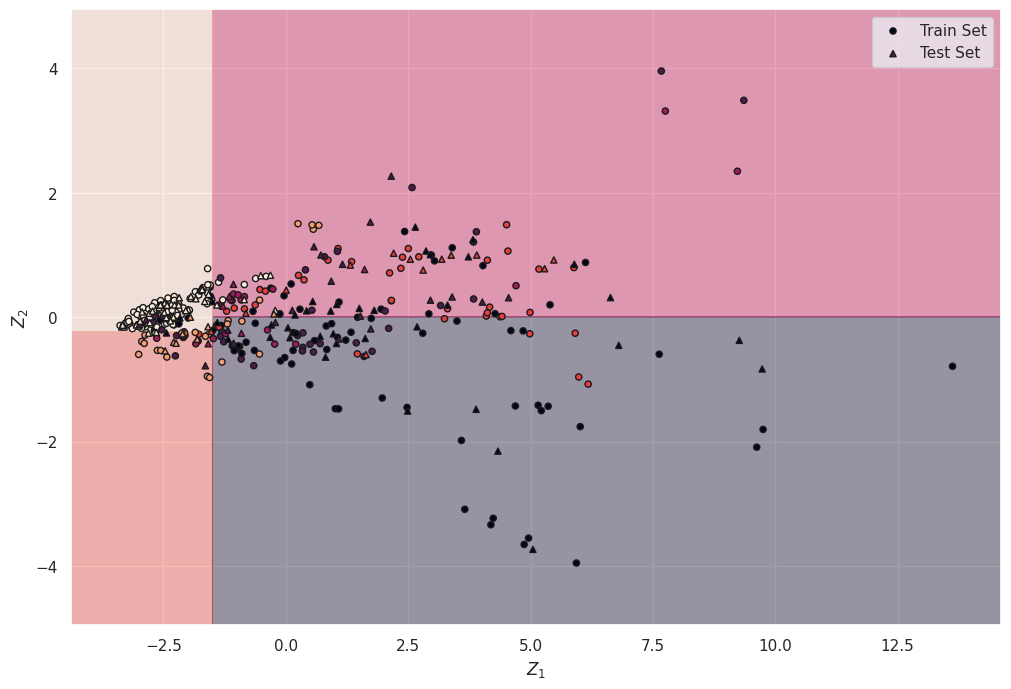

In [165]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

## **ROC Curves**

DATASET: FULL DATA


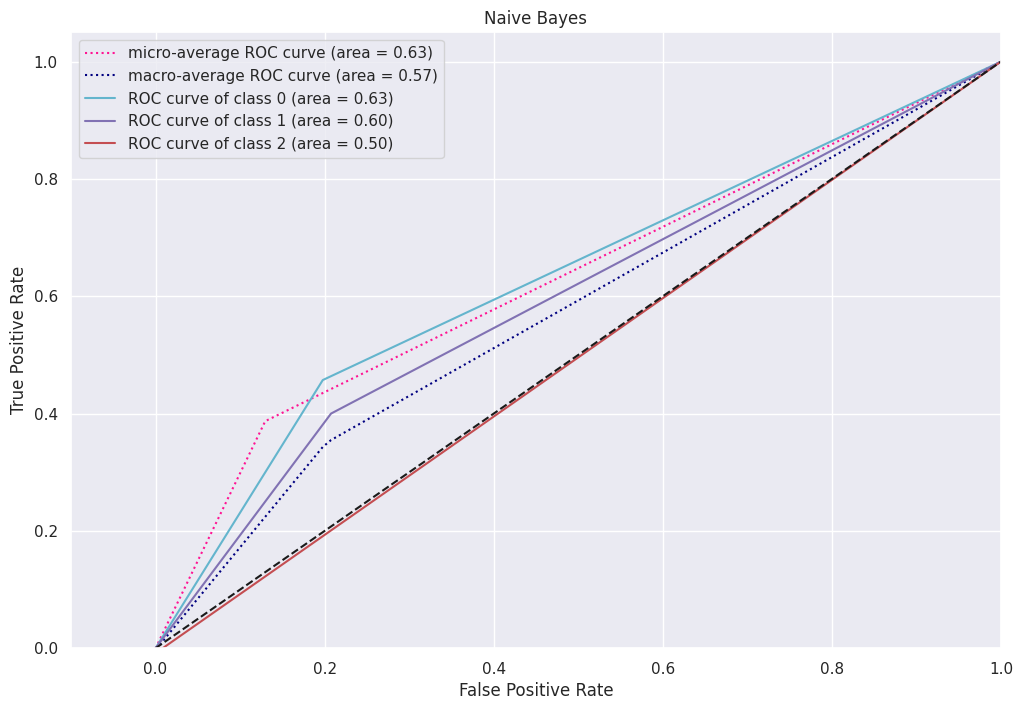

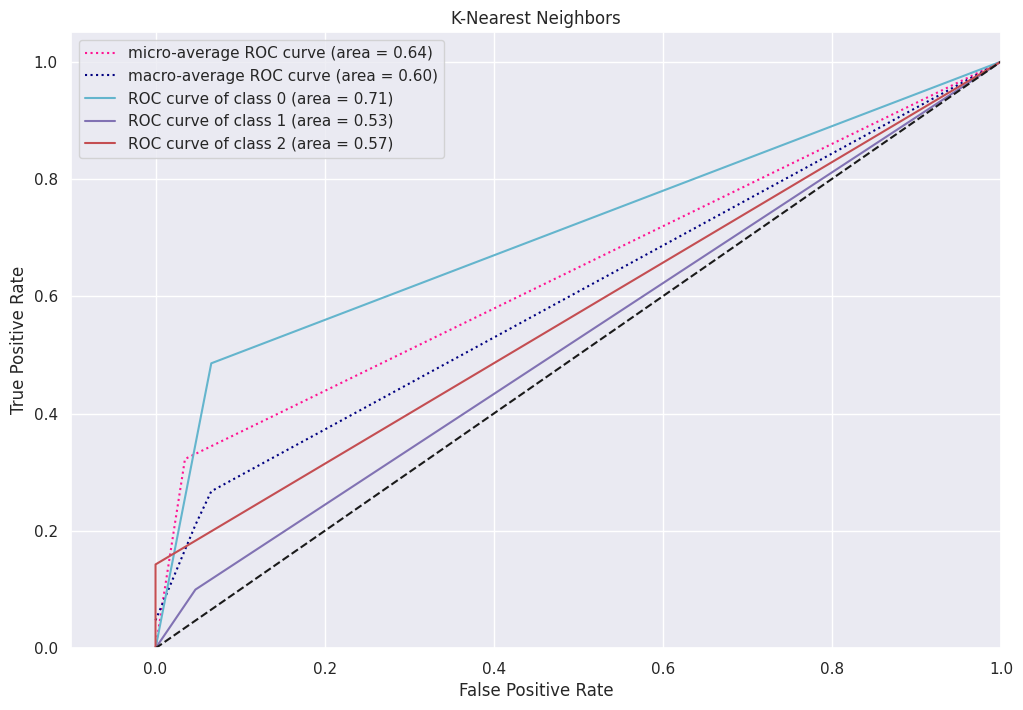

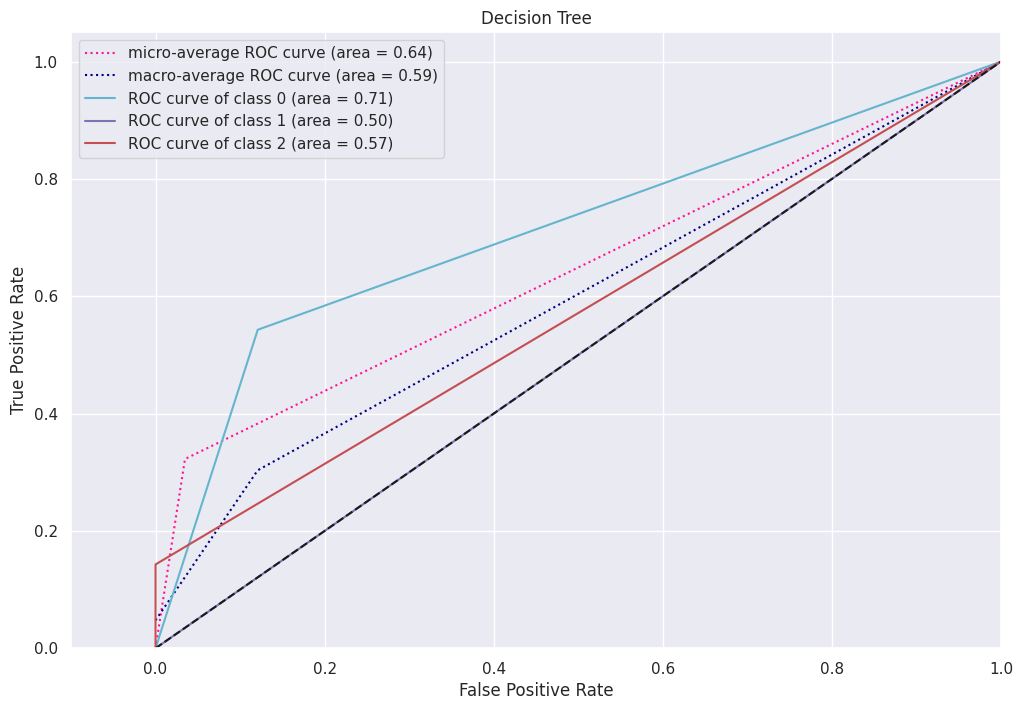

DATASET: Z


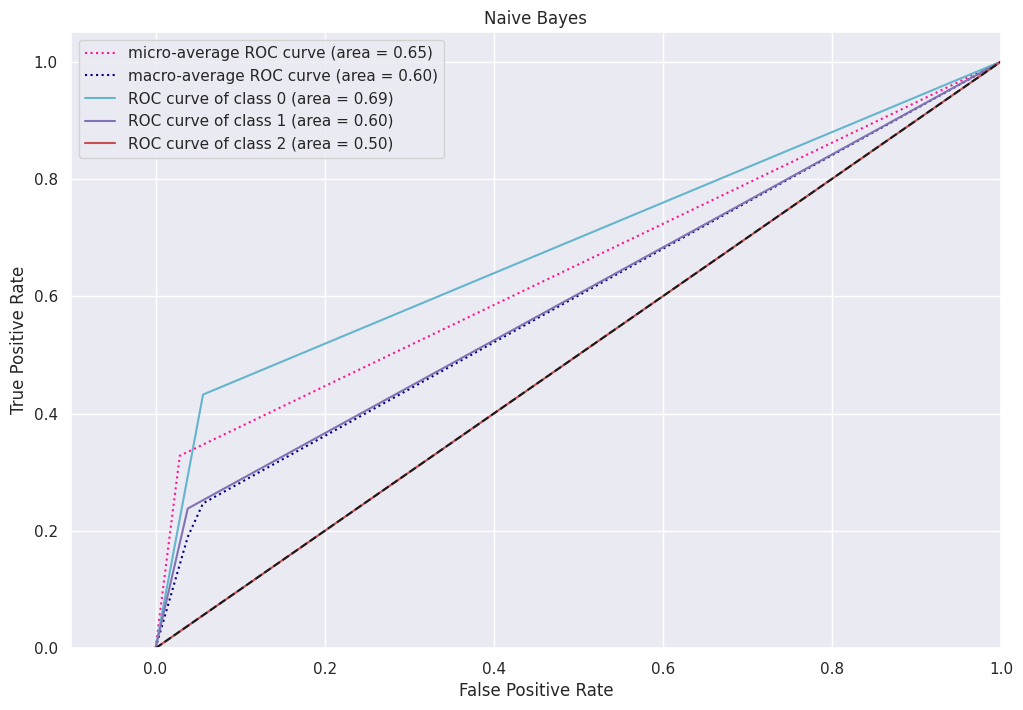

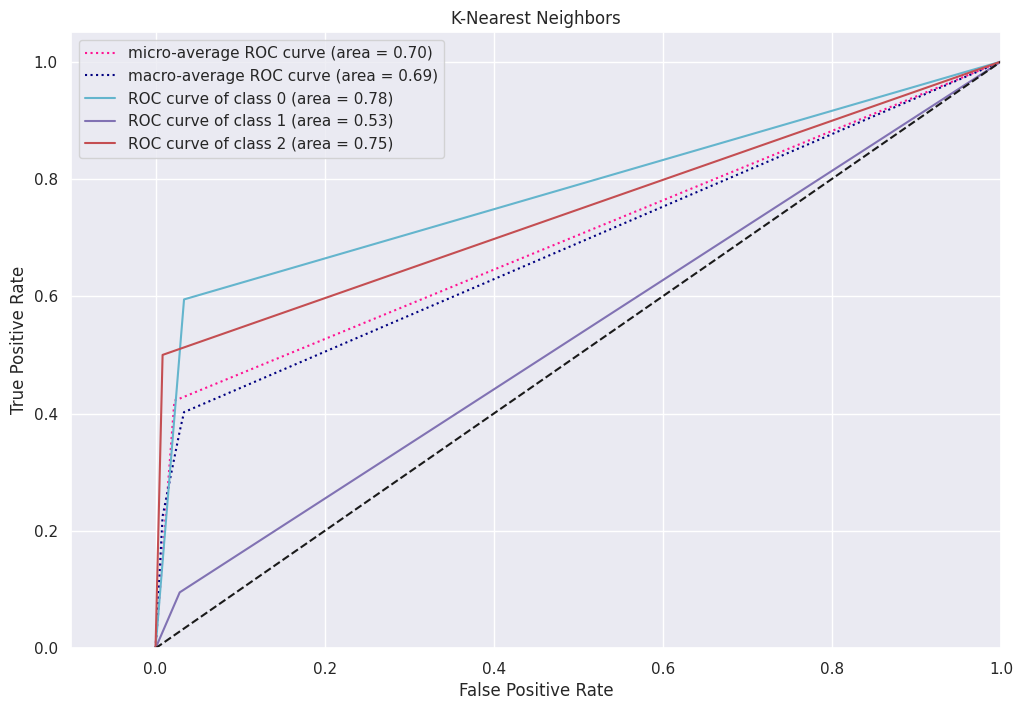

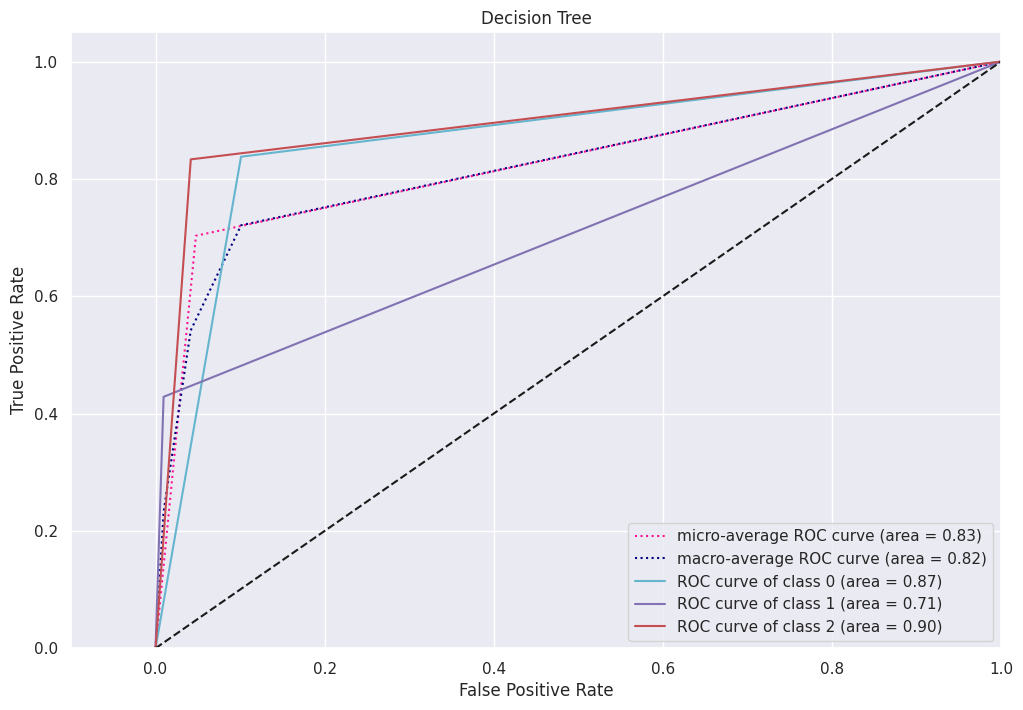

DATASET: Z12


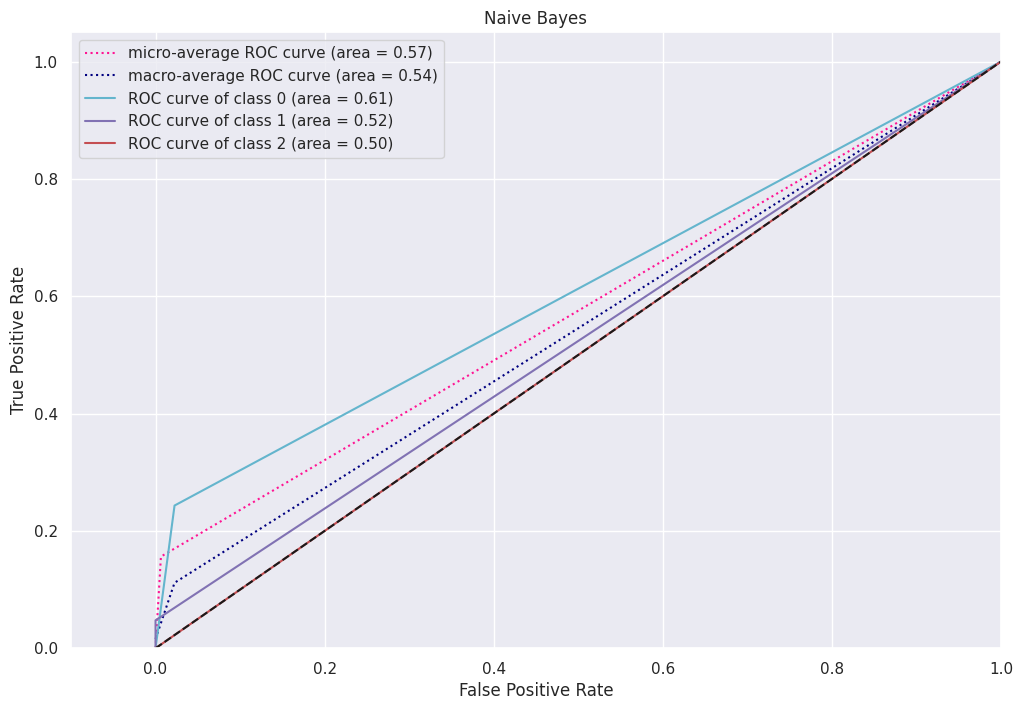

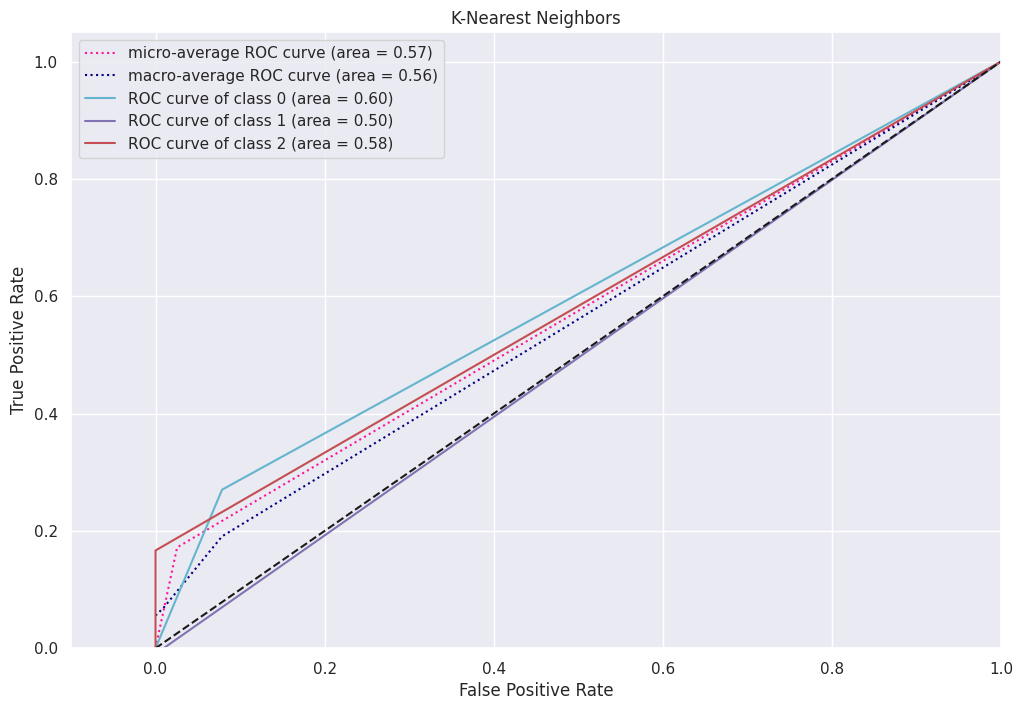

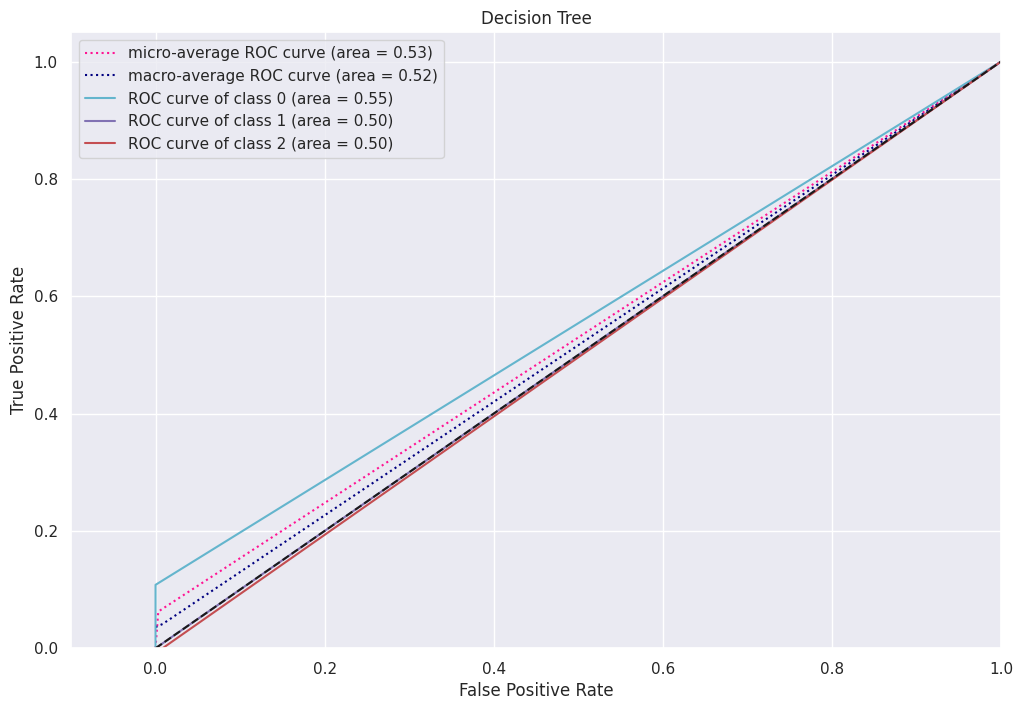

In [166]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

## **Bar Chart Plot**

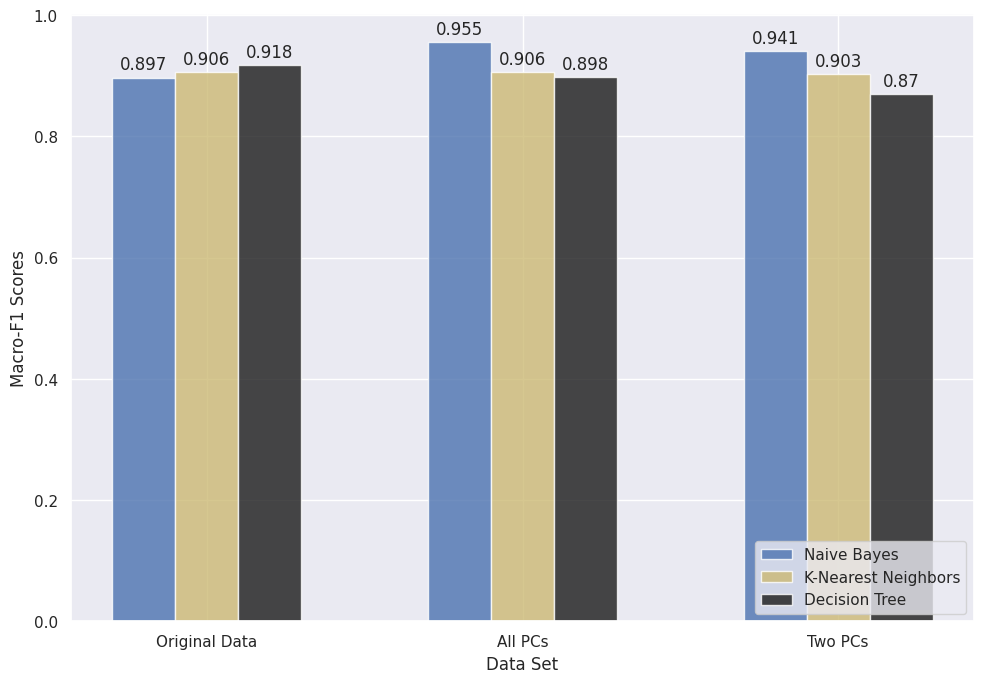

In [167]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()